<a href="https://colab.research.google.com/github/mtinti/thermoresponse/blob/main/Gustavo_ThermoResponse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import sys
from tqdm.auto import tqdm
np.random.seed(42)
plt.style.use('ggplot')
import scipy.stats as stats
#from boruta import BorutaPy

'''
The proteomic analysis is from a DIANN analysis of April23
("<file://>\\estorage.dundee.ac.uk\dgh-lab\Gustavo\DIA analysis\331_2022_GB_DIANN (HeatShock)").
 This also includes Supernatant sample (SN) but we only need the comparison of the cell extract.

The RNAseq is from Nov24
("\\estorage.dundee.ac.uk\dgh-lab\Gustavo\F24A430002166_TRYtczxR
<file://\\estorage.dundee.ac.uk\dgh-lab\Gustavo\F24A430002166_TRYtczxR>").
This also includes the AGO1 null mutant that we don't need for this analysis.

creation of embedding from mean
https://pmc.ncbi.nlm.nih.gov/articles/PMC11343214/
Benchmarking DNA Foundation Models for Genomic Sequence Classification
using mean token embedding HyenaDNA 450k


Analysis by RNA-seq of transcriptomic changes elicited by heat shock in Leishmania major
https://www.nature.com/articles/s41598-019-43354-9


Proteome changes associated with Leishmania donovani promastigote adaptation to oxidative and nitrosative stresses
https://www.sciencedirect.com/science/article/pii/S1874391913000390#!

The protein map of the protozoan parasite Leishmania (Leishmania) amazonensis, Leishmania (Viannia)
braziliensis and Leishmania (Leishmania) infantum during growth phase transition and temperature stress
https://pubmed.ncbi.nlm.nih.gov/38237666/

Proteomic analysis of Trypanosoma cruzi epimastigotes subjected to heat shock
https://pubmed.ncbi.nlm.nih.gov/22287837/


https://training.galaxyproject.org/training-material/topics/statistics/tutorials/genomic-llm-pretraining/tutorial.html

Embed-Search-Align: DNA sequence alignment using Transformer models
https://academic.oup.com/bioinformatics/article/41/3/btaf041/8003678


https://github.com/lucidrains/alphafold3-pytorch?tab=readme-ov-file

https://github.com/bytedance/Protenix/tree/main
We’re excited to introduce Protenix — a trainable, open-source PyTorch reproduction of AlphaFold 3.


https://github.com/jekamax/docker-meme-suite-web/tree/master

'''

<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3533193984.py:28: SyntaxWarning: invalid escape sequence '\d'
  ("<file://>\\estorage.dundee.ac.uk\dgh-lab\Gustavo\DIA analysis\331_2022_GB_DIANN (HeatShock)").


'\nThe proteomic analysis is from a DIANN analysis of April23\n("<file://>\\estorage.dundee.ac.uk\\dgh-lab\\Gustavo\\DIA analysisÙ_2022_GB_DIANN (HeatShock)").\n This also includes Supernatant sample (SN) but we only need the comparison of the cell extract.\n\nThe RNAseq is from Nov24\n("\\estorage.dundee.ac.uk\\dgh-lab\\Gustavo\\F24A430002166_TRYtczxR\n<file://\\estorage.dundee.ac.uk\\dgh-lab\\Gustavo\\F24A430002166_TRYtczxR>").\nThis also includes the AGO1 null mutant that we don\'t need for this analysis.\n\ncreation of embedding from mean\nhttps://pmc.ncbi.nlm.nih.gov/articles/PMC11343214/\nBenchmarking DNA Foundation Models for Genomic Sequence Classification\nusing mean token embedding HyenaDNA 450k\n\n\nAnalysis by RNA-seq of transcriptomic changes elicited by heat shock in Leishmania major\nhttps://www.nature.com/articles/s41598-019-43354-9\n\n\nProteome changes associated with Leishmania donovani promastigote adaptation to oxidative and nitrosative stresses\nhttps://www.scienc

In [ ]:
'''
The protein map of the protozoan parasite Leishmania (Leishmania) amazonensis,
Leishmania (Viannia) braziliensis and Leishmania (Leishmania) infantum during
growth phase transition and temperature stress
https://www.sciencedirect.com/science/article/pii/S1874391924000204?via%3Dihub#da0005

In this study, the proteomes of
Leishmania (Leishmania) amazonensis (La),
Leishmania (Viannia) braziliensis (Lb),
and Leishmania (Leishmania) infantum (syn L. L. chagasi) (Lc)
were analyzed using quantitative proteomics to uncover the proteome
modulation in three different conditions related to growth phases and temperature shifts:
1) exponential phase (Exp);
2) stationary phase (Sta25) and;
3) stationary phase subjected to heat stress (Sta34).


In particular, the first stationary phase (Sta25) was cultured and maintained at 25 °C for 7 days,
while the Sta34 was maintained at 25 °C for 6 days and then shifted to 34 °C for 24 h.
This last condition mimics the thermal shock when the parasites are transferred
from the phlebotomine sand fly to the vertebrate host.

MS/MS spectra were searched against the combined Uniprot reference proteomes of
Leishmania mexicana strain MHOM/GT/2001/U1103 (UP000007259),
Leishmania braziliensis (UP000007258) and
Leishmania infantum database (UP000008153)

'''

'\nThe protein map of the protozoan parasite Leishmania (Leishmania) amazonensis,\nLeishmania (Viannia) braziliensis and Leishmania (Leishmania) infantum during\ngrowth phase transition and temperature stress\nhttps://www.sciencedirect.com/science/article/pii/S1874391924000204?via%3Dihub#da0005\n\nIn this study, the proteomes of\nLeishmania (Leishmania) amazonensis (La),\nLeishmania (Viannia) braziliensis (Lb),\nand Leishmania (Leishmania) infantum (syn L. L. chagasi) (Lc)\nwere analyzed using quantitative proteomics to uncover the proteome\nmodulation in three different conditions related to growth phases and temperature shifts:\n1) exponential phase (Exp);\n2) stationary phase (Sta25) and;\n3) stationary phase subjected to heat stress (Sta34).\n\n\nIn particular, the first stationary phase (Sta25) was cultured and maintained at 25 °C for 7 days,\nwhile the Sta34 was maintained at 25 °C for 6 days and then shifted to 34 °C for 24 h.\nThis last condition mimics the thermal shock when t

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://mmseqs.com/latest/mmseqs-linux-avx2.tar.gz; tar xvfz mmseqs-linux-avx2.tar.gz; export PATH=$(pwd)/mmseqs/bin/:$PATH

--2025-10-24 08:47:12--  https://mmseqs.com/latest/mmseqs-linux-avx2.tar.gz
Resolving mmseqs.com (mmseqs.com)... 158.247.200.62
Connecting to mmseqs.com (mmseqs.com)|158.247.200.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19100137 (18M) [application/octet-stream]
Saving to: ‘mmseqs-linux-avx2.tar.gz’

mmseqs-linux-avx2.t 100%[===================>]  18.21M  9.70MB/s    in 1.9s    

2025-10-24 08:47:14 (9.70 MB/s) - ‘mmseqs-linux-avx2.tar.gz’ saved [19100137/19100137]

mmseqs/
mmseqs/userguide.pdf
mmseqs/examples/
mmseqs/examples/DB.fasta
mmseqs/examples/QUERY.fasta
mmseqs/LICENSE.md
mmseqs/README.md
mmseqs/matrices/
mmseqs/matrices/PAM120.out
mmseqs/matrices/PAM190.out
mmseqs/matrices/PAM130.out
mmseqs/matrices/blosum62.out
mmseqs/matrices/blosum80.out
mmseqs/matrices/blosum95.out
mmseqs/matrices/PAM20.out
mmseqs/matrices/blosum75.out
mmseqs/matrices/blosum100.out
mmseqs/matrices/PAM40.out
mmseqs/matrices/PAM100.out
mmseqs/matrices/VTML200.out
mmseqs/mat

In [ ]:
%%bash
/content/mmseqs/bin/mmseqs -h

MMseqs2 (Many against Many sequence searching) is an open-source software suite for very fast, 
parallelized protein sequence searches and clustering of huge protein sequence data sets.

Please cite: M. Steinegger and J. Soding. MMseqs2 enables sensitive protein sequence searching for the analysis of massive data sets. Nature Biotechnology, doi:10.1038/nbt.3988 (2017).

MMseqs2 Version: 89f75fec7fdbb0f3be99801a7b2b75e8f2895c5f
© Martin Steinegger (martin.steinegger@snu.ac.kr)

usage: mmseqs <command> [<args>]

Easy workflows for plain text input/output
  easy-search       	Sensitive homology search
  easy-linsearch    	Fast, less sensitive homology search
  easy-cluster      	Slower, sensitive clustering
  easy-linclust     	Fast linear time cluster, less sensitive clustering
  easy-proteomecluster	Cluster proteomes and identify reference proteomes
  easy-taxonomy     	Taxonomic classification
  easy-rbh          	Find reciprocal best hit

Main workflows for database input/output
  sea

In [ ]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/utility')
from concordance_index import concordance_index
from regression_line import abline
from repeated_analysis import repeated_analysis
from cross_validate_random_forest import cross_validate_random_forest
from string_utils import multiple_replace
from feature_selections import recursive_feature_elimination
from norm import tpm

In [ ]:
!pwd

/content


In [ ]:
def make_df(embedding, index, feature):
  df = pd.DataFrame(embedding, index=index)
  df.columns = [f'component_{n}_{feature}' for n in range(embedding.shape[1])]
  return df

def load_embedding(feature):
  sequences = pd.read_csv(
      f'/content/drive/MyDrive/trypanosoma_sequences_{feature}.csv')
  print(sequences.shape)
  sequences.head()


  embedding = np.load(
    f'/content/drive/MyDrive/embeddings_927_hyenadna-medium-450k-seqlen-hf_trypanosoma_sequences_{feature}.csv.npy')
  embedding = make_df(embedding, sequences['gene_id'].values, feature)

  return embedding

In [ ]:
embedding_cds = load_embedding('cds')
embedding_cds.head()
print(embedding_cds.head())
embedding_5utr = load_embedding('5utr')
embedding_5utr.head()
print(embedding_5utr.head())
embedding_3utr = load_embedding('3utr')
embedding_3utr.head()
print(embedding_3utr.head())

(6812, 2)
             component_0_cds  component_1_cds  component_2_cds  \
Tb927.8.340        -0.594172        -0.799709        -0.498332   
Tb927.8.380        -0.596873        -0.753108        -0.485856   
Tb927.8.480        -0.611929        -0.717985        -0.547209   
Tb927.8.540        -0.571023        -0.614790        -0.471160   
Tb927.8.550        -0.599642        -0.752161        -0.561859   

             component_3_cds  component_4_cds  component_5_cds  \
Tb927.8.340        -0.771471        -0.668196        -0.517761   
Tb927.8.380        -0.797770        -0.715908        -0.545042   
Tb927.8.480        -0.599242        -0.623547        -0.623070   
Tb927.8.540        -0.664055        -0.432063        -0.420647   
Tb927.8.550        -0.611022        -0.628800        -0.606348   

             component_6_cds  component_7_cds  component_8_cds  \
Tb927.8.340         0.919666        -0.473147        -0.841933   
Tb927.8.380         0.926729        -0.470535        -0.825597  

In [ ]:
abu = pd.read_csv('/content/drive/MyDrive/variables/log_mean_rna.csv',index_col=[0])
abu.head()
print(abu.shape)
TE = pd.read_csv('/content/drive/MyDrive/variables/TE.csv',index_col=[0])
TE.head()
print(TE.shape)

(6560, 1)
(6560, 1)


In [ ]:
manual_feaures = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_DATASET.csv.gz',index_col=0)
manual_feaures['Len_CDS'] = [np.log10(len(n)) for n in manual_feaures['cds_seq']]
manual_feaures['Len_3utr'] = [np.log10(len(n)) for n in manual_feaures['sequence_3p']]
manual_feaures['Len_5utr'] = [np.log10(len(n)) for n in manual_feaures['sequence_5p']]
print(manual_feaures.shape)
manual_feaures.head()

(6923, 59)


,sequence_3p,sequence_5p,cds_seq,utr_3_count_A,utr_3_count_T,utr_3_count_C,utr_3_count_G,utr_3_count_AT,utr_3_count_CG,utr_3_count_CT,...,RIBO_SRR1272136,RIBO_SRR1272137,RIBO_SRR1272138,RNA_SRR1272145,RNA_SRR1272146,RNA_SRR1272147,Length,Len_CDS,Len_3utr,Len_5utr
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,CTTCCTTTCTTTCTTTTTTCCCCCACCGCTTACTCTTTATCTATAC...,ATGTTAAGTTTTTTGATTGACTGCAGCGAAGACAAAACTGATCTCA...,0.173913,0.451691,0.200483,0.173913,0.625604,0.374396,0.652174,...,416,144,84,1131,139,737,1410,3.149219,2.617000,2.176091
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,GCCACACGGGGGCGAGCCGATTTGGGTGGTATTTTTTCCTCCCTTC...,ATGAGTAGTGAGAGATATGTGGATGGTGACCTCGGTGAGCCTTTTA...,0.205882,0.379412,0.200000,0.214706,0.585294,0.414706,0.579412,...,293,162,70,1018,156,373,489,2.689309,2.531479,2.176091
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,AGTGTGCTCTGTTGACACTGTTGGTGTAATTAATCTATTTCAAATA...,ATGACCACGTTCAAGCGGGAAGACCTCCGTCGTGTCTTTTTTAGTG...,0.192802,0.406170,0.177378,0.223650,0.598972,0.401028,0.583548,...,640,245,155,1748,259,756,777,2.890421,2.589950,2.176091
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,GTGCTGAATAAGCAGCCGTGTCCACAAAACGAGAAGGAGGCCGGTG...,ATGGGTCGGGCAACAGAGGCACAACGTGCCGAAATGGCAAAGGAGG...,0.190476,0.359307,0.229437,0.220779,0.549784,0.450216,0.588745,...,494,219,101,1317,218,1320,2835,3.452553,2.664642,2.176091
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,AAAGGATAGCACAGGTCCTCCCCCCTTTTTTCTTGGGCAGTACTCT...,ATGTTATTCACCCGCTGTCTGCTAGCGGTCACGACAATCAACAGTA...,0.181132,0.362264,0.264151,0.192453,0.543396,0.456604,0.626415,...,463,178,149,449,81,426,519,2.715167,2.423246,2.176091


In [ ]:
def split_protein_ids(df):
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df_expanded = df.copy()
    # Split the protein IDs in the 'Unnamed: 0' column
    df_expanded['split_proteins'] = df_expanded['Unnamed: 0'].str.split(';')
    # Explode the dataframe to create a row for each protein ID
    df_expanded = df_expanded.explode('split_proteins')
    # Replace the original 'Unnamed: 0' column with the split protein IDs
    df_expanded['Unnamed: 0'] = df_expanded['split_proteins']
    # Drop the temporary 'split_proteins' column
    df_expanded = df_expanded.drop(columns=['split_proteins'])
    # Reset the index
    df_expanded = df_expanded.reset_index(drop=True)
    return df_expanded

In [ ]:
proteomics = pd.read_csv('/content/drive/MyDrive/gustavo_data/all_cellular_comparisons.csv')
proteomics = split_protein_ids(proteomics)
proteomics['Unnamed: 0']=	[n.split(':')[0] for n in proteomics['Unnamed: 0']]
proteomics = proteomics[proteomics['Unnamed: 0'].isin(manual_feaures.index)]
proteomics = proteomics.set_index('Unnamed: 0')
proteomics.head()
proteomics = proteomics[[ n for n in proteomics.columns if 'C34.' in n or 'C40.' in n or 'C34_C40' in n] ]
proteomics['C34_C40_logFC'] = proteomics['C34_C40_logFC']*-1
proteomics = proteomics.sort_values('C34_C40_logFC')
proteomics.tail()

proteomics=proteomics[proteomics['C34_C40_AveExpr']>18]
up_proteins = proteomics[
    (proteomics['C34_C40_logFC']>0.3) &
    (proteomics['C34_C40_adj.P.Val']<0.01)
    ]
print(up_proteins.shape)
up_proteins.tail(10)

(346, 14)


,C34.A,C34.B,C34.C,C40.A,C40.B,C40.C,C34_C40_logFC,C34_C40_AveExpr,C34_C40_t,C34_C40_P.Value,C34_C40_adj.P.Val,C34_C40_B,C34_C40_log10pval,C34_C40_log10adjpval
Unnamed: 0,,,,,,,,,,,,,,
Tb927.1.3200,1.368121e+07,1.531229e+07,1.503496e+07,3.477041e+07,3.503574e+07,3.731832e+07,1.341497,24.360550,-21.460080,1.730817e-08,1.566127e-06,10.354249,7.761749,5.805173
Tb927.1.3390,7.172956e+06,7.269190e+06,8.846009e+06,1.918180e+07,1.735056e+07,2.180243e+07,1.382910,23.464351,-14.491614,3.994999e-07,1.179272e-05,7.015683,6.398483,4.928386
Tb927.2.6220,1.488325e+06,1.465875e+06,1.495617e+06,3.511222e+06,3.898369e+06,3.996811e+06,1.413543,21.025284,-24.073042,6.845136e-09,9.733131e-07,11.312934,8.164618,6.011747
Tb927.1.1400,4.506054e+06,4.335046e+06,4.722416e+06,1.186988e+07,1.257678e+07,1.180376e+07,1.476263,22.643930,-27.180663,2.560968e-09,5.462178e-07,12.309033,8.591596,6.262634
Tb927.9.1520,1.242468e+06,1.601378e+06,1.760072e+06,3.938400e+06,3.534478e+06,4.814542e+06,1.477158,21.165013,-10.098153,6.661782e-06,8.782376e-05,3.952921,5.176410,4.056388
Tb927.1.4830,1.901841e+07,1.884469e+07,1.884895e+07,4.973217e+07,5.561146e+07,5.227324e+07,1.530907,24.763548,-18.037113,6.992477e-08,3.877313e-06,8.884117,7.155369,5.411469
Tb927.11.15480,1.897353e+07,2.018835e+07,1.786712e+07,7.336041e+07,7.506886e+07,7.832549e+07,2.050335,24.986073,-26.310122,3.334206e-09,6.033903e-07,12.043964,8.477008,6.219402
Tb927.2.5980,3.291465e+07,3.287015e+07,3.356075e+07,1.726535e+08,1.778567e+08,1.754166e+08,2.462003,25.969562,-66.860732,1.667006e-12,3.318454e-09,18.574745,11.778063,8.479064
Tb927.10.3680,NaN,NaN,NaN,6.981166e+05,6.065707e+05,7.690936e+05,2.981282,18.688265,-9.954723,7.430310e-06,9.501887e-05,3.833446,5.128993,4.022190


In [ ]:
down_proteins = proteomics[
    (proteomics['C34_C40_logFC']<-0.55) &
    (proteomics['C34_C40_adj.P.Val']<0.01)
    ]
print(down_proteins.shape)
down_proteins.tail(10)

(348, 14)


,C34.A,C34.B,C34.C,C40.A,C40.B,C40.C,C34_C40_logFC,C34_C40_AveExpr,C34_C40_t,C34_C40_P.Value,C34_C40_adj.P.Val,C34_C40_B,C34_C40_log10pval,C34_C40_log10adjpval
Unnamed: 0,,,,,,,,,,,,,,
Tb927.9.9080,2.072977e+06,1.971662e+06,2.180123e+06,1.375759e+06,1.329045e+06,1.360857e+06,-0.555755,20.727449,14.334608,4.354446e-07,0.000012,6.922593,6.361067,4.905094
Tb927.7.1440,1.252638e+06,1.279400e+06,1.433442e+06,8.768460e+05,8.458770e+05,8.659729e+05,-0.555162,20.139118,12.709258,1.122768e-06,0.000024,5.895731,5.949710,4.626908
Tb927.9.11120,3.369672e+06,3.337960e+06,3.336310e+06,2.039100e+06,1.986848e+06,2.593502e+06,-0.554461,21.435878,5.856295,3.477321e-04,0.001568,-0.375603,3.458755,2.804523
Tb927.3.3460,4.767105e+06,4.992698e+06,4.992233e+06,3.338027e+06,3.068625e+06,3.251448e+06,-0.553940,22.003852,14.343653,4.332785e-07,0.000012,6.927983,6.363233,4.905176
Tb927.11.8980,9.934895e+05,9.883931e+05,1.011216e+06,5.924633e+05,6.665830e+05,7.049699e+05,-0.553803,19.647322,7.003103,1.002915e-04,0.000604,0.982661,3.998736,3.219065
Tb927.3.2630,5.366265e+05,4.923592e+05,5.685045e+05,3.571774e+05,3.588542e+05,3.290484e+05,-0.553112,18.751328,10.692938,4.295472e-06,0.000065,4.432812,5.366989,4.188565
Tb927.11.15880,2.148585e+08,2.312520e+08,2.183609e+08,1.536439e+08,1.494493e+08,1.330041e+08,-0.551907,27.454129,10.161527,6.350755e-06,0.000087,4.005234,5.197175,4.062529
Tb927.11.15900,2.148585e+08,2.312520e+08,2.183609e+08,1.536439e+08,1.494493e+08,1.330041e+08,-0.551907,27.454129,10.161527,6.350755e-06,0.000087,4.005234,5.197175,4.062529
Tb927.11.12770,1.595858e+06,1.437994e+06,1.566552e+06,1.021169e+06,9.877264e+05,1.004684e+06,-0.551236,20.278056,14.101087,4.957869e-07,0.000014,6.782261,6.304705,4.865045


In [ ]:
control_proteins = proteomics[
    (proteomics['C34_C40_logFC']<0.02) &
    (proteomics['C34_C40_logFC']>-0.02)
    ]
control_proteins.shape

(320, 14)

In [ ]:
Up_vs_Control = pd.concat([up_proteins,
                                            control_proteins])
print(Up_vs_Control.shape)
Up_vs_Control['Target']=[1 for n in range(up_proteins.shape[0])]+[0 for n in range(control_proteins.shape[0])]
print(Up_vs_Control['Target'].value_counts())
Up_vs_Control.head()

(666, 14)
Target
1    346
0    320
Name: count, dtype: int64


,C34.A,C34.B,C34.C,C40.A,C40.B,C40.C,C34_C40_logFC,C34_C40_AveExpr,C34_C40_t,C34_C40_P.Value,C34_C40_adj.P.Val,C34_C40_B,C34_C40_log10pval,C34_C40_log10adjpval,Target
Unnamed: 0,,,,,,,,,,,,,,,
Tb927.11.1010,2.966859e+06,3.003218e+06,3.374715e+06,3.732902e+06,3.551857e+06,3.759558e+06,0.300783,21.700581,-6.912547,0.000110,0.000649,0.881285,3.958503,3.187564,1
Tb927.6.4770,4.426268e+07,4.522064e+07,4.582169e+07,5.312234e+07,5.416825e+07,5.290425e+07,0.301391,25.555705,-9.194730,0.000014,0.000145,3.174182,4.867514,3.838969,1
Tb927.11.10350,1.918116e+06,2.000180e+06,2.019846e+06,2.324976e+06,2.271237e+06,2.437169e+06,0.301654,21.028702,-7.805216,0.000046,0.000340,1.840479,4.338916,3.468053,1
Tb927.11.550,4.681574e+07,5.071488e+07,5.235989e+07,6.055376e+07,5.441345e+07,6.266622e+07,0.301710,25.713102,-5.385733,0.000607,0.002422,-0.982714,3.216474,2.615749,1
Tb927.10.12360,4.357038e+06,4.773568e+06,4.175545e+06,5.061759e+06,5.217168e+06,5.463963e+06,0.301867,22.208423,-4.420608,0.002102,0.006365,-2.324912,2.677462,2.196172,1


In [ ]:
Up_vs_Down = pd.concat([up_proteins,
                                            down_proteins])
print(Up_vs_Control.shape)
Up_vs_Down['Target']=[1 for n in range(up_proteins.shape[0])]+[0 for n in range(down_proteins.shape[0])]
print(Up_vs_Down['Target'].value_counts())
Up_vs_Down.head()

(666, 15)
Target
0    348
1    346
Name: count, dtype: int64


,C34.A,C34.B,C34.C,C40.A,C40.B,C40.C,C34_C40_logFC,C34_C40_AveExpr,C34_C40_t,C34_C40_P.Value,C34_C40_adj.P.Val,C34_C40_B,C34_C40_log10pval,C34_C40_log10adjpval,Target
Unnamed: 0,,,,,,,,,,,,,,,
Tb927.11.1010,2.966859e+06,3.003218e+06,3.374715e+06,3.732902e+06,3.551857e+06,3.759558e+06,0.300783,21.700581,-6.912547,0.000110,0.000649,0.881285,3.958503,3.187564,1
Tb927.6.4770,4.426268e+07,4.522064e+07,4.582169e+07,5.312234e+07,5.416825e+07,5.290425e+07,0.301391,25.555705,-9.194730,0.000014,0.000145,3.174182,4.867514,3.838969,1
Tb927.11.10350,1.918116e+06,2.000180e+06,2.019846e+06,2.324976e+06,2.271237e+06,2.437169e+06,0.301654,21.028702,-7.805216,0.000046,0.000340,1.840479,4.338916,3.468053,1
Tb927.11.550,4.681574e+07,5.071488e+07,5.235989e+07,6.055376e+07,5.441345e+07,6.266622e+07,0.301710,25.713102,-5.385733,0.000607,0.002422,-0.982714,3.216474,2.615749,1
Tb927.10.12360,4.357038e+06,4.773568e+06,4.175545e+06,5.061759e+06,5.217168e+06,5.463963e+06,0.301867,22.208423,-4.420608,0.002102,0.006365,-2.324912,2.677462,2.196172,1


In [ ]:
Down_vs_Control = pd.concat([down_proteins,
                                            control_proteins])

print(Down_vs_Control.shape)
Down_vs_Control['Target']=[1 for n in range(down_proteins.shape[0])]+[0 for n in range(control_proteins.shape[0])]
print(Down_vs_Control['Target'].value_counts())


(668, 14)
Target
1    348
0    320
Name: count, dtype: int64


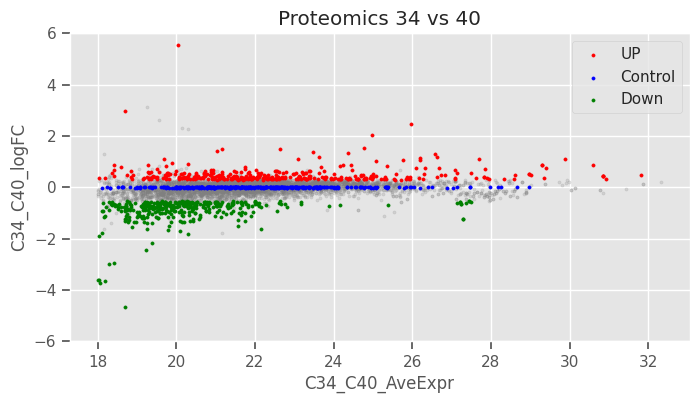

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
proteomics.plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,s=5,alpha=0.2,c='grey')
proteomics.loc[up_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='r',s=5,label='UP')
proteomics.loc[control_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='blue',s=5,label='Control')
proteomics.loc[down_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='green',s=5,label='Down')
plt.title('Proteomics 34 vs 40')
plt.ylim(-6,+6)
plt.show()


In [ ]:
Proteomics_Up_vs_Control   = Up_vs_Control.copy()
Proteomics_Down_vs_Control = Down_vs_Control.copy()
Proteomics_Up_vs_Down = Up_vs_Down.copy()

In [ ]:
Proteomics_Up_vs_Control = Proteomics_Up_vs_Control[['C34_C40_logFC', 'C34_C40_AveExpr', 'Target']]
Proteomics_Up_vs_Control.index.name='gene_id'
Proteomics_Up_vs_Control.head()

,C34_C40_logFC,C34_C40_AveExpr,Target
gene_id,,,
Tb927.11.1010,0.300783,21.700581,1
Tb927.6.4770,0.301391,25.555705,1
Tb927.11.10350,0.301654,21.028702,1
Tb927.11.550,0.301710,25.713102,1
Tb927.10.12360,0.301867,22.208423,1


In [ ]:
Proteomics_Up_vs_Control.tail()

,C34_C40_logFC,C34_C40_AveExpr,Target
gene_id,,,
Tb927.10.15840,0.019745,19.176248,0
Tb927.9.1410,0.019745,21.238223,0
Tb927.8.6870,0.019810,22.509225,0
Tb927.10.5790,0.019931,23.168177,0
Tb927.9.3130,0.019962,20.583926,0


In [ ]:
gustavo_path = '/content/drive/MyDrive/gustavo_data'
gustavo_data = pd.read_csv(f'{gustavo_path}/WT40_vs_WT34.txt',sep='\t',index_col=[0])

gustavo_data = gustavo_data[~gustavo_data.index.str.startswith('gene')]
gustavo_data = gustavo_data[gustavo_data.index.isin(manual_feaures.index)]
gustavo_data = gustavo_data.sort_values('logFC')
gustavo_data = gustavo_data[gustavo_data['logCPM']>1]
gustavo_data.shape

(6915, 5)

In [ ]:
gustavo_data

,logFC,logCPM,F,PValue,FDR
Tb927.8.5120,-1.558485,5.958156,237.611143,7.452644e-15,1.094141e-12
Tb927.8.6033,-1.326815,6.762957,282.948454,8.848842e-16,1.807472e-13
Tb927.11.16130,-1.216670,9.407431,119.767029,2.133616e-11,9.546410e-10
Tb11.v5.0911,-1.198308,7.698646,17.804848,2.495104e-04,9.157813e-04
Tb927.9.10400,-1.195539,7.565319,294.875833,5.321296e-16,1.136339e-13
...,...,...,...,...,...
Tb927.7.1340,2.293643,8.776583,192.941171,9.020501e-14,9.313915e-12
Tb927.10.12710,2.307187,10.412236,608.573676,5.634085e-20,3.150912e-17
Tb927.2.5980,3.128328,8.058307,1712.544544,7.529442e-26,7.074664e-22
Tb927.11.15480,3.203795,7.232273,992.216404,9.880534e-23,4.641875e-19


In [ ]:
up_rnaseq = gustavo_data[
    (gustavo_data['logFC']>0.4) &
    (gustavo_data['FDR']<0.01)
    ]
print(up_rnaseq.shape)

(325, 5)


In [ ]:
down_rnaseq = gustavo_data[
    (gustavo_data['logFC']<-0.4) &
    (gustavo_data['FDR']<0.01)
    ]
print(down_rnaseq.shape)

(336, 5)


In [ ]:
control_rnaseq = gustavo_data[
    (gustavo_data['logFC']  <  0.015) &
    (gustavo_data['logFC']  > -0.015)
    ]
print(control_rnaseq.shape)

(351, 5)


In [ ]:
Rna_Seq_Up_vs_Control = pd.concat([up_rnaseq,
                                            control_rnaseq])
print(Rna_Seq_Up_vs_Control.shape)
Rna_Seq_Up_vs_Control['Target']=[1 for n in range(up_rnaseq.shape[0])]+[0 for n in range(control_rnaseq.shape[0])]
print(Rna_Seq_Up_vs_Control['Target'].value_counts())
Rna_Seq_Up_vs_Control = Rna_Seq_Up_vs_Control[['logFC','logCPM','Target']]
Rna_Seq_Up_vs_Control.head()

(676, 5)
Target
0    351
1    325
Name: count, dtype: int64


,logFC,logCPM,Target
Tb927.9.9600,0.402368,6.392609,1
Tb927.6.3230,0.402894,6.268679,1
Tb927.10.3680,0.403359,5.290798,1
Tb927.8.3380,0.403613,6.591594,1
Tb927.7.7380,0.403652,4.935773,1


In [ ]:
Rna_Seq_Down_vs_Control = pd.concat([down_rnaseq,
                                            control_rnaseq])

print(Rna_Seq_Down_vs_Control.shape)
Rna_Seq_Down_vs_Control['Target']=[1 for n in range(down_rnaseq.shape[0])]+[0 for n in range(control_rnaseq.shape[0])]
Rna_Seq_Down_vs_Control = Rna_Seq_Down_vs_Control[['logFC','logCPM','Target']]
print(Rna_Seq_Down_vs_Control['Target'].value_counts())

(687, 5)
Target
0    351
1    336
Name: count, dtype: int64


In [ ]:
Rna_Seq_Up_vs_Down = pd.concat([up_rnaseq,
                                            down_rnaseq])

print(Rna_Seq_Up_vs_Down.shape)
Rna_Seq_Up_vs_Down['Target']=[1 for n in range(up_rnaseq.shape[0])]+[0 for n in range(down_rnaseq.shape[0])]
Rna_Seq_Up_vs_Down = Rna_Seq_Up_vs_Down[['logFC','logCPM','Target']]
print(Rna_Seq_Up_vs_Down['Target'].value_counts())

(661, 5)
Target
0    336
1    325
Name: count, dtype: int64


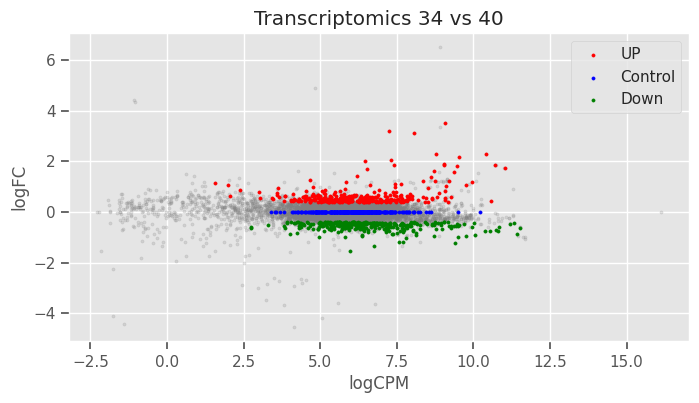

In [ ]:
gustavo_path = '/content/drive/MyDrive/gustavo_data'
gustavo_data = pd.read_csv(f'{gustavo_path}/WT40_vs_WT34.txt',sep='\t',index_col=[0])
fig,ax = plt.subplots(figsize=(8,4))
gustavo_data.plot(kind='scatter',x='logCPM',y='logFC',ax=ax,s=5,alpha=0.2,c='grey')
gustavo_data.loc[up_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='r',s=5,label='UP')
gustavo_data.loc[control_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='blue',s=5,label='Control')
gustavo_data.loc[down_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='green',s=5,label='Down')
plt.title('Transcriptomics 34 vs 40')
plt.show()

In [ ]:
df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Proteomics_Up_vs_Control[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
classification_proteomics = df.copy()
classification_proteomics.head()

Target
1.0    311
0.0    271
Name: count, dtype: int64


,component_0_cds,component_1_cds,component_2_cds,component_3_cds,component_4_cds,component_5_cds,component_6_cds,component_7_cds,component_8_cds,component_9_cds,...,component_247_3utr,component_248_3utr,component_249_3utr,component_250_3utr,component_251_3utr,component_252_3utr,component_253_3utr,component_254_3utr,component_255_3utr,Target
Tb927.8.700,-0.665156,-0.725225,-0.541300,-0.651791,-0.560393,-0.484442,0.915187,-0.448703,-0.761294,0.388878,...,1.268578,0.457805,-0.403577,-0.238338,-0.653890,0.629380,0.414252,0.228417,0.713249,0.0
Tb927.8.800,-0.592519,-0.653846,-0.465035,-0.647877,-0.418329,-0.404401,0.874986,-0.464338,-0.772786,0.439940,...,1.198147,0.440228,-0.498462,-0.291662,-0.675345,0.787555,0.526326,0.376381,0.683718,0.0
Tb927.8.820,-0.612043,-0.752984,-0.512496,-0.662508,-0.530249,-0.569319,0.828733,-0.442059,-0.747808,0.393323,...,1.246242,0.458545,-0.455866,-0.247897,-0.596694,0.633455,0.479452,0.287400,0.746755,0.0
Tb927.8.890,-0.570131,-0.720989,-0.545911,-0.651265,-0.651808,-0.578034,0.776058,-0.491395,-0.863479,0.394654,...,1.171089,0.315976,-0.474260,-0.331722,-0.689189,0.731342,0.690089,0.385673,0.650505,1.0
Tb927.8.1050,-0.558190,-0.628969,-0.453257,-0.678757,-0.541956,-0.381697,0.888442,-0.427588,-0.808983,0.486238,...,1.122197,0.460103,-0.444596,-0.320385,-0.551598,0.669606,0.548595,0.342336,0.728673,0.0


In [ ]:
df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Rna_Seq_Up_vs_Control[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
print(df.shape)
classification_rna_seq = df.copy()
classification_rna_seq.head()

Target
0.0    281
1.0    269
Name: count, dtype: int64
(550, 769)


,component_0_cds,component_1_cds,component_2_cds,component_3_cds,component_4_cds,component_5_cds,component_6_cds,component_7_cds,component_8_cds,component_9_cds,...,component_247_3utr,component_248_3utr,component_249_3utr,component_250_3utr,component_251_3utr,component_252_3utr,component_253_3utr,component_254_3utr,component_255_3utr,Target
Tb927.8.670,-0.566744,-0.689858,-0.571477,-0.628455,-0.698939,-0.570604,0.834648,-0.455378,-0.879387,0.407463,...,1.154631,0.457786,-0.460798,-0.275852,-0.711971,0.742098,0.500968,0.387052,0.670095,1.0
Tb927.8.830,-0.657426,-0.671847,-0.499995,-0.670776,-0.471365,-0.430539,0.895953,-0.462125,-0.736467,0.394869,...,1.227742,0.468319,-0.413773,-0.224792,-0.585805,0.685030,0.468213,0.239207,0.709391,1.0
Tb927.8.900,-0.572252,-0.651654,-0.498856,-0.609237,-0.882018,-0.445438,0.909149,-0.440103,-0.905557,0.386216,...,1.136222,0.384027,-0.487396,-0.336156,-0.637104,0.697249,0.603343,0.314567,0.663047,0.0
Tb927.8.990,-0.642812,-0.714794,-0.530983,-0.579237,-0.794686,-0.522425,0.902362,-0.512644,-0.844743,0.285106,...,1.138703,0.337996,-0.485921,-0.292958,-0.681095,0.672526,0.619906,0.332298,0.675100,1.0
Tb927.8.1280,-0.651230,-0.686489,-0.514421,-0.668412,-0.562112,-0.401068,0.918021,-0.430697,-0.783369,0.446660,...,1.120267,0.417653,-0.463682,-0.329781,-0.690941,0.753470,0.568390,0.384778,0.657221,0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

def random_forest_classification(X, y):
    """
    Perform Random Forest Classification with cross-validation and visualizations

    Parameters:
    -----------
    X : pandas DataFrame
        Feature matrix
    y : array-like
        Target variable (binary classification)

    Returns:
    --------
    dict: Contains model, predictions, and performance metrics
    """
    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(
        n_estimators=50,
        random_state=42,
        min_samples_leaf = 2,
        max_depth = 10,
        #max_features = 15,
        class_weight='balanced'
    )

    # Stratified 3-Fold Cross-Validation
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Perform cross-validated predictions
    y_pred_proba = cross_val_predict(
        rf_classifier,
        X,
        y,
        cv=cv,
        method='predict_proba'
    )

    # Fit the final model on entire dataset
    rf_classifier.fit(X, y)

    # ROC AUC Calculation and Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(121)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
    auc = roc_auc_score(y, y_pred_proba[:, 1])

    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # Confusion Matrix
    plt.subplot(122)
    y_pred = np.argmax(y_pred_proba, axis=1)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.tight_layout()
    plt.show()

    # Feature Importance - Top 10
    plt.figure(figsize=(12, 6))
    feature_importance = rf_classifier.feature_importances_
    feature_names = X.columns

    # Sort features by importance
    indices = np.argsort(feature_importance)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]
    sorted_importance = feature_importance[indices]

    # Select top 10 features
    top_10_indices = indices[:10]
    top_10_feature_names = [feature_names[i] for i in top_10_indices]
    top_10_importance = feature_importance[top_10_indices]

    # Plot top 10 features
    plt.bar(range(len(top_10_feature_names)), top_10_importance)
    plt.title('Top 10 Feature Importance')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(range(len(top_10_feature_names)), top_10_feature_names, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print top 10 feature importances
    print("\nTop 10 Feature Importances:")
    for name, importance in zip(top_10_feature_names, top_10_importance):
        print(f"{name}: {importance:.4f}")

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y, y_pred))

    return {
        'model': rf_classifier,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc': auc,
        'feature_importance': feature_importance,
        'feature_names': feature_names,
         'fpr':fpr,
         'tpr':tpr,
        'indices':indices
    }


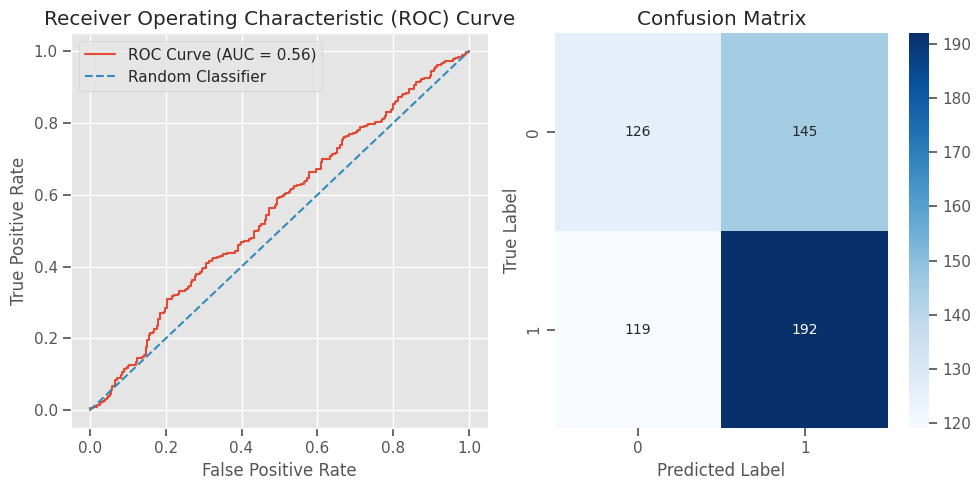

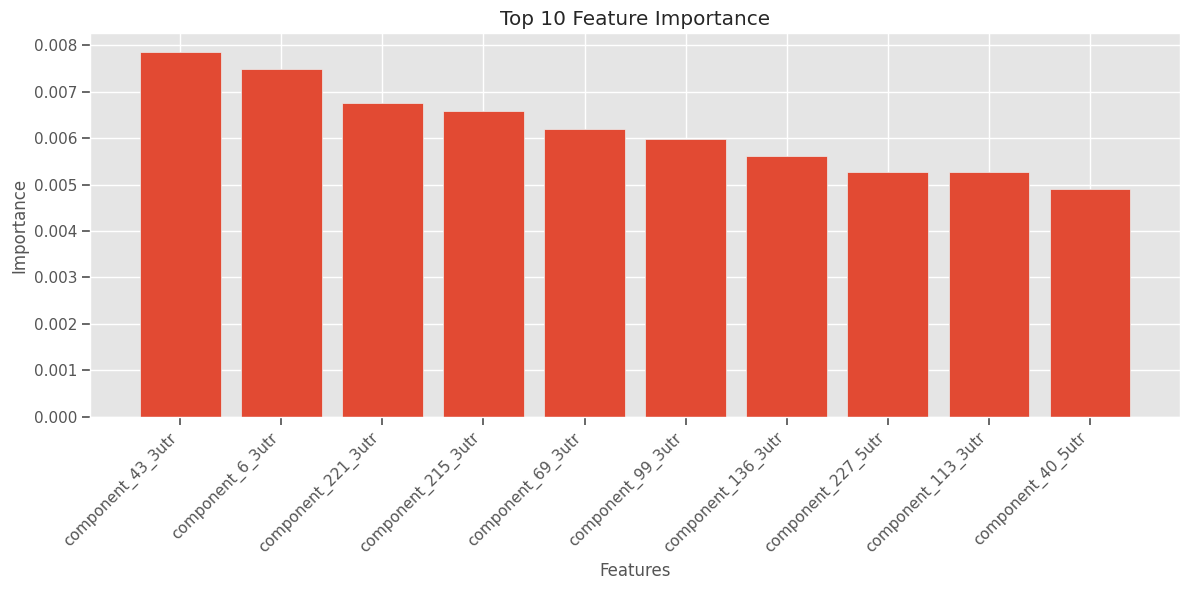


Top 10 Feature Importances:
component_43_3utr: 0.0079
component_6_3utr: 0.0075
component_221_3utr: 0.0068
component_215_3utr: 0.0066
component_69_3utr: 0.0062
component_99_3utr: 0.0060
component_136_3utr: 0.0056
component_227_5utr: 0.0053
component_113_3utr: 0.0053
component_40_5utr: 0.0049
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.49       271
         1.0       0.57      0.62      0.59       311

    accuracy                           0.55       582
   macro avg       0.54      0.54      0.54       582
weighted avg       0.54      0.55      0.54       582



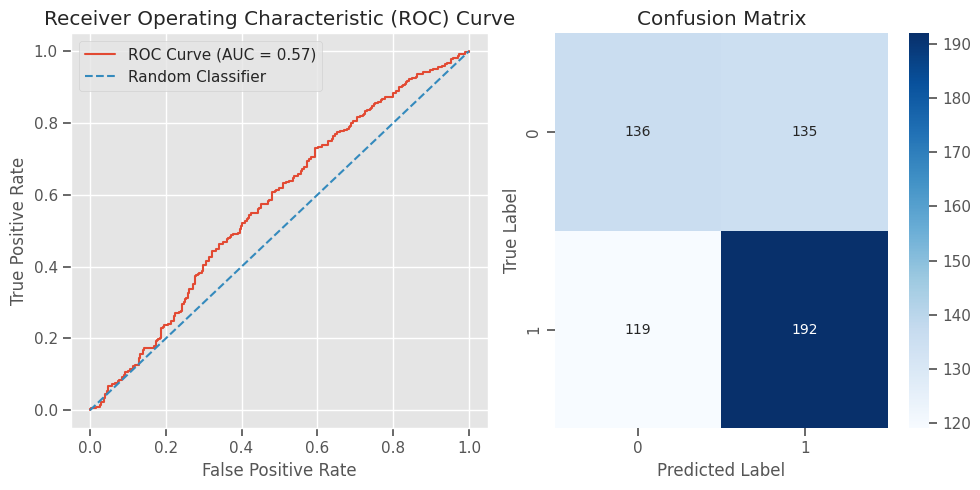

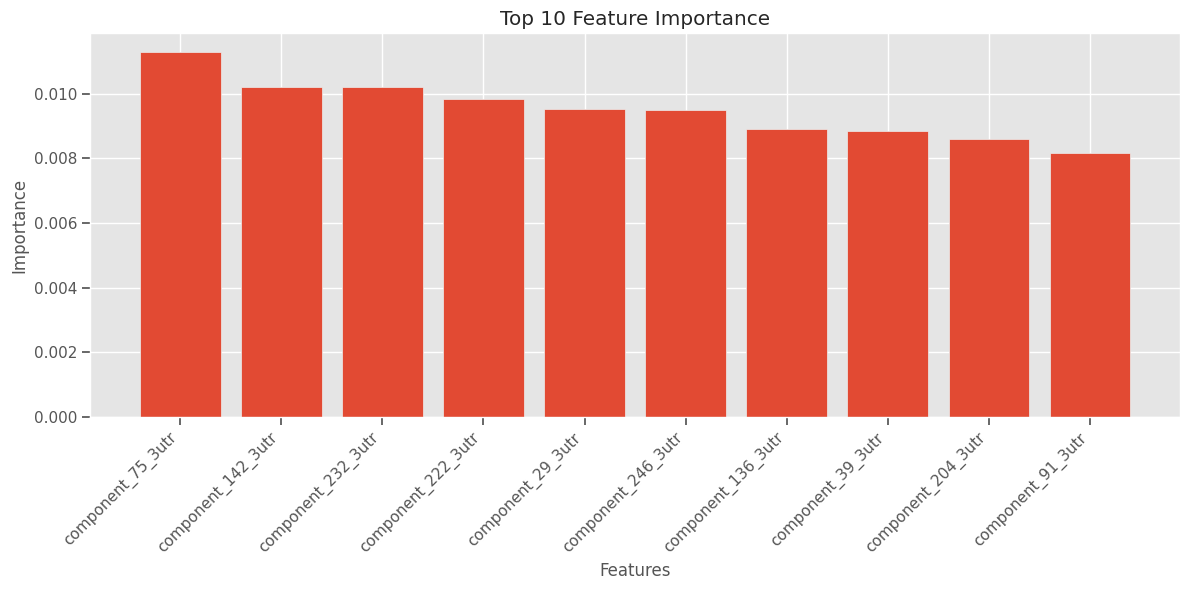


Top 10 Feature Importances:
component_75_3utr: 0.0113
component_142_3utr: 0.0102
component_232_3utr: 0.0102
component_222_3utr: 0.0098
component_29_3utr: 0.0095
component_246_3utr: 0.0095
component_136_3utr: 0.0089
component_39_3utr: 0.0088
component_204_3utr: 0.0086
component_91_3utr: 0.0082
Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.50      0.52       271
         1.0       0.59      0.62      0.60       311

    accuracy                           0.56       582
   macro avg       0.56      0.56      0.56       582
weighted avg       0.56      0.56      0.56       582



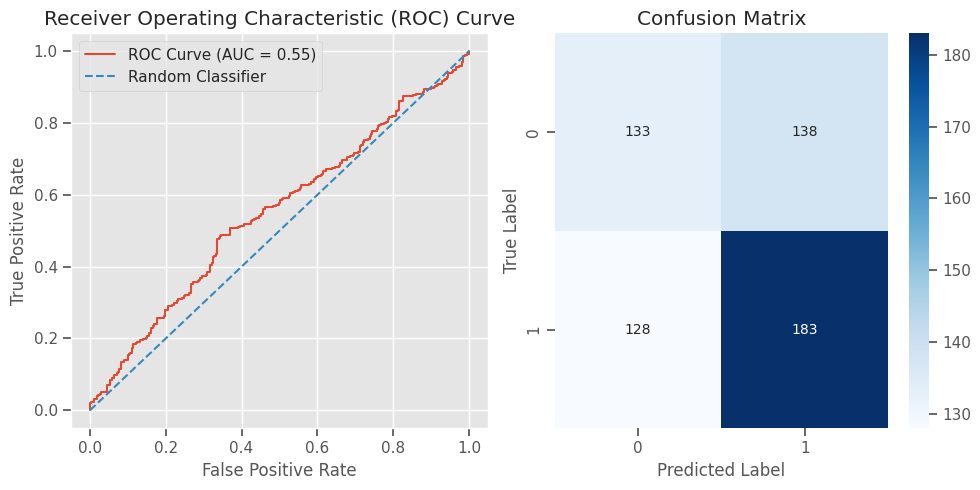

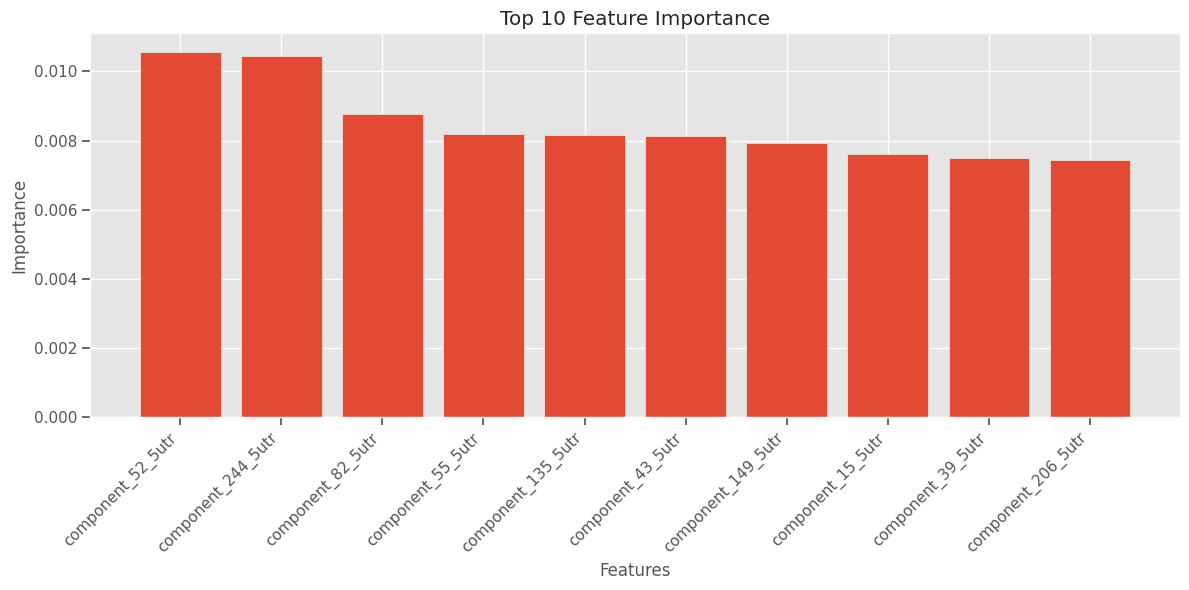


Top 10 Feature Importances:
component_52_5utr: 0.0106
component_244_5utr: 0.0104
component_82_5utr: 0.0088
component_55_5utr: 0.0082
component_135_5utr: 0.0082
component_43_5utr: 0.0081
component_149_5utr: 0.0079
component_15_5utr: 0.0076
component_39_5utr: 0.0075
component_206_5utr: 0.0074
Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.49      0.50       271
         1.0       0.57      0.59      0.58       311

    accuracy                           0.54       582
   macro avg       0.54      0.54      0.54       582
weighted avg       0.54      0.54      0.54       582



In [ ]:
X=classification_proteomics[[n for n in classification_proteomics.columns if n.startswith('component_')]]
y=classification_proteomics['Target']
# Example usage (commented out)
results_proteomics_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_proteomics['preds'] = results_proteomics_all['predictions']

results_proteomics_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_proteomics_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

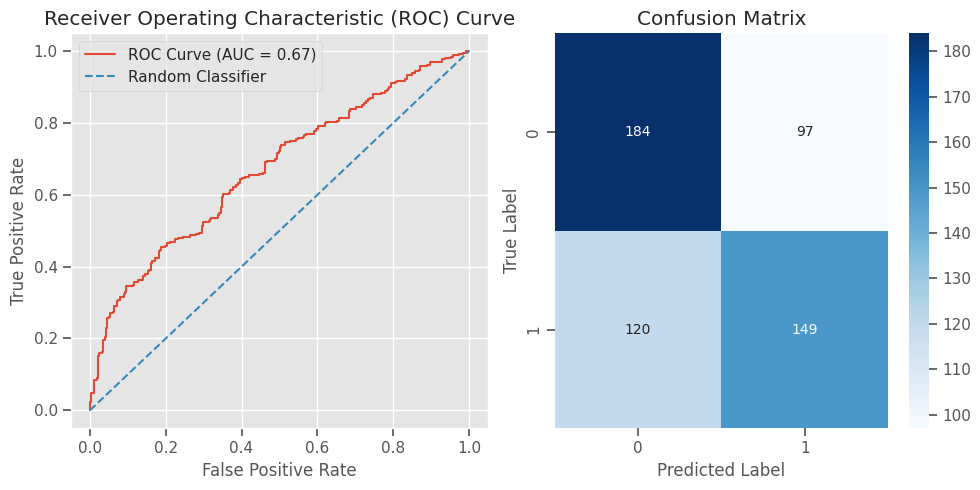

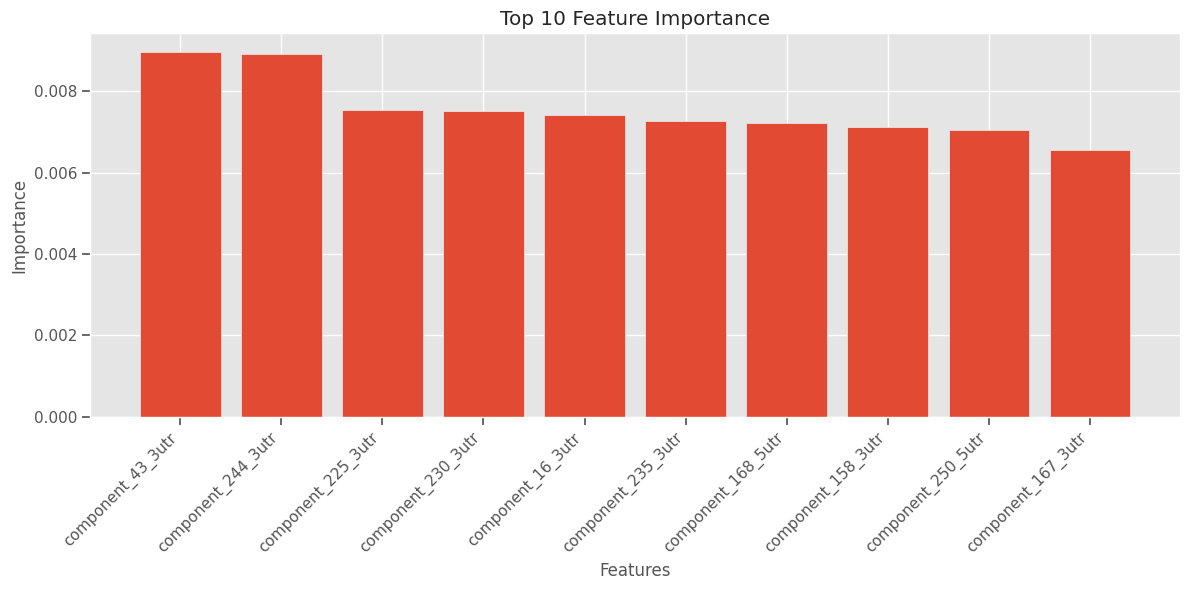


Top 10 Feature Importances:
component_43_3utr: 0.0090
component_244_3utr: 0.0089
component_225_3utr: 0.0075
component_230_3utr: 0.0075
component_16_3utr: 0.0074
component_235_3utr: 0.0073
component_168_5utr: 0.0072
component_158_3utr: 0.0071
component_250_5utr: 0.0070
component_167_3utr: 0.0066
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63       281
         1.0       0.61      0.55      0.58       269

    accuracy                           0.61       550
   macro avg       0.61      0.60      0.60       550
weighted avg       0.61      0.61      0.60       550



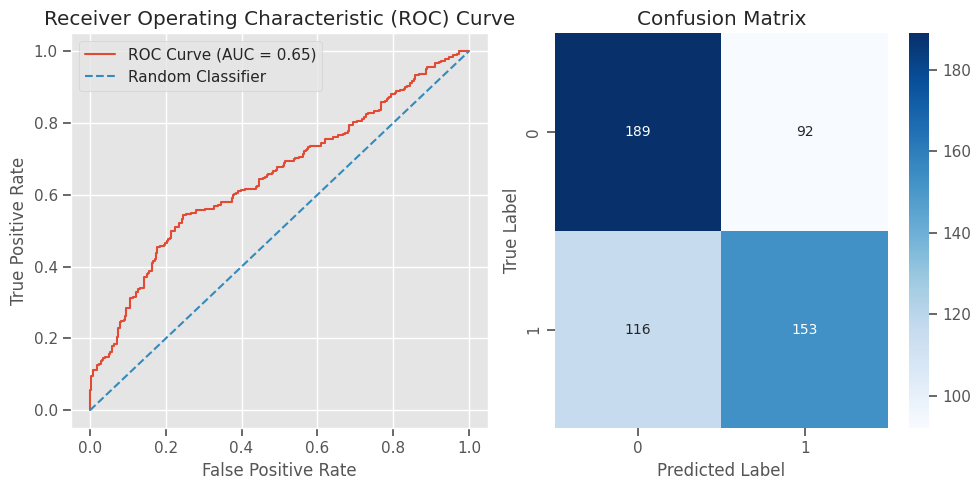

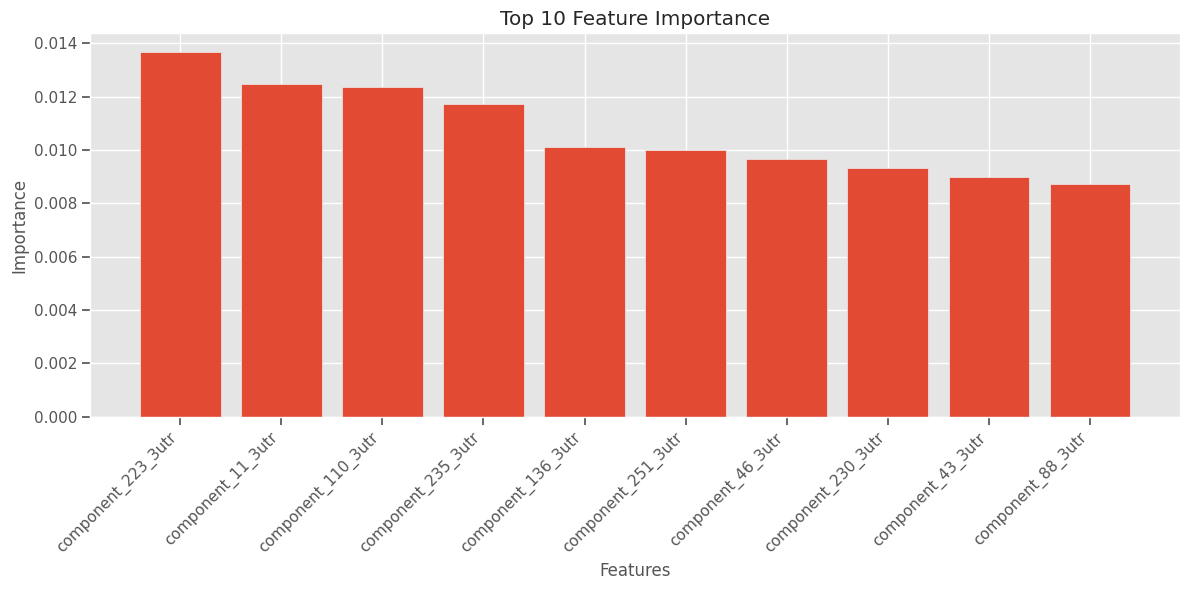


Top 10 Feature Importances:
component_223_3utr: 0.0137
component_11_3utr: 0.0125
component_110_3utr: 0.0124
component_235_3utr: 0.0117
component_136_3utr: 0.0101
component_251_3utr: 0.0100
component_46_3utr: 0.0097
component_230_3utr: 0.0093
component_43_3utr: 0.0090
component_88_3utr: 0.0087
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.67      0.65       281
         1.0       0.62      0.57      0.60       269

    accuracy                           0.62       550
   macro avg       0.62      0.62      0.62       550
weighted avg       0.62      0.62      0.62       550



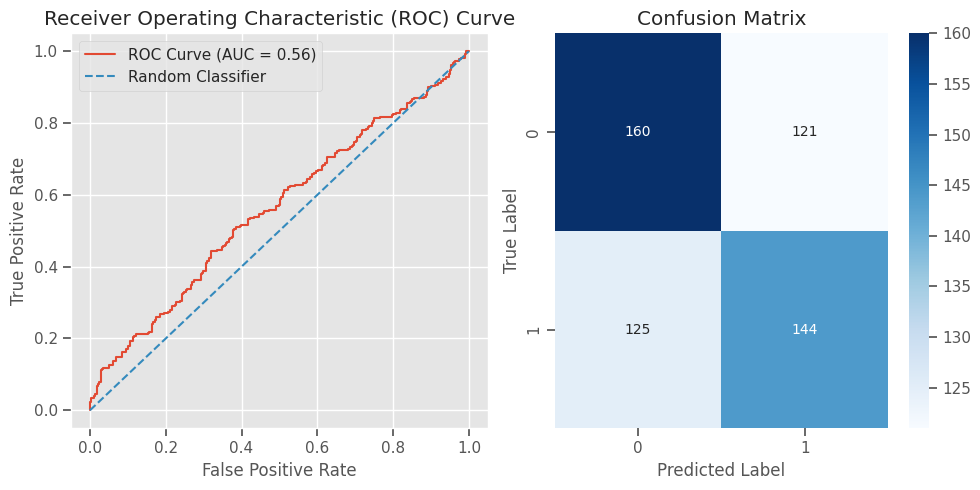

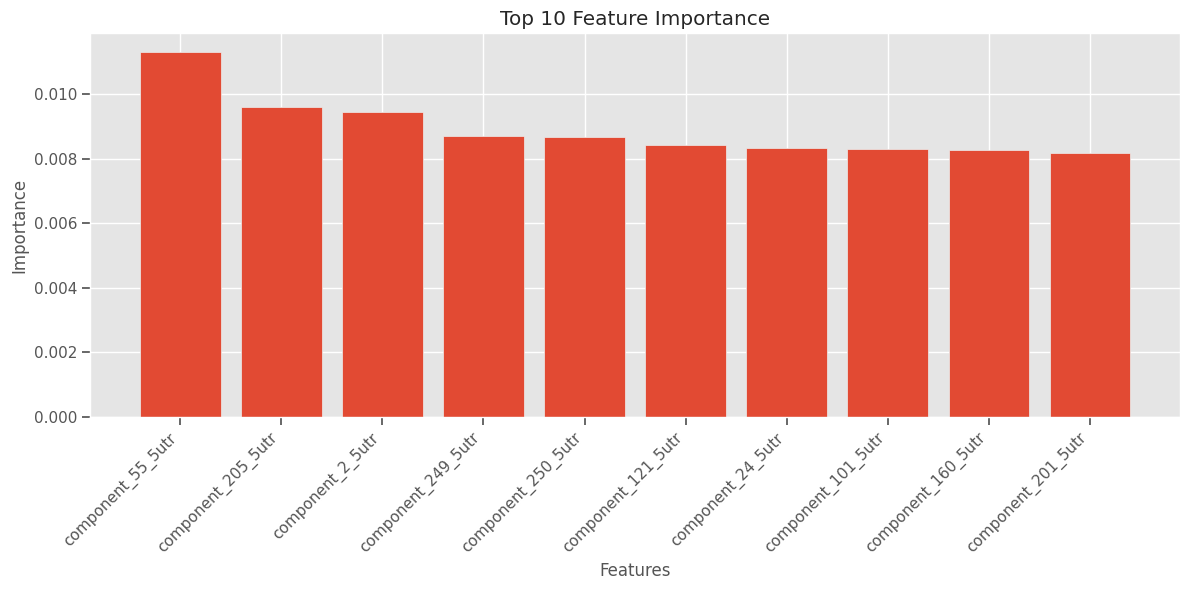


Top 10 Feature Importances:
component_55_5utr: 0.0113
component_205_5utr: 0.0096
component_2_5utr: 0.0095
component_249_5utr: 0.0087
component_250_5utr: 0.0087
component_121_5utr: 0.0084
component_24_5utr: 0.0083
component_101_5utr: 0.0083
component_160_5utr: 0.0083
component_201_5utr: 0.0082
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.57       281
         1.0       0.54      0.54      0.54       269

    accuracy                           0.55       550
   macro avg       0.55      0.55      0.55       550
weighted avg       0.55      0.55      0.55       550



In [ ]:
X=classification_rna_seq[[n for n in classification_rna_seq.columns if n.startswith('component_')]]
y=classification_rna_seq['Target']
# Example usage (commented out)
results_rna_seq_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_rna_seq['preds'] = results_rna_seq_all['predictions']

results_rna_seq_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_rna_seq_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

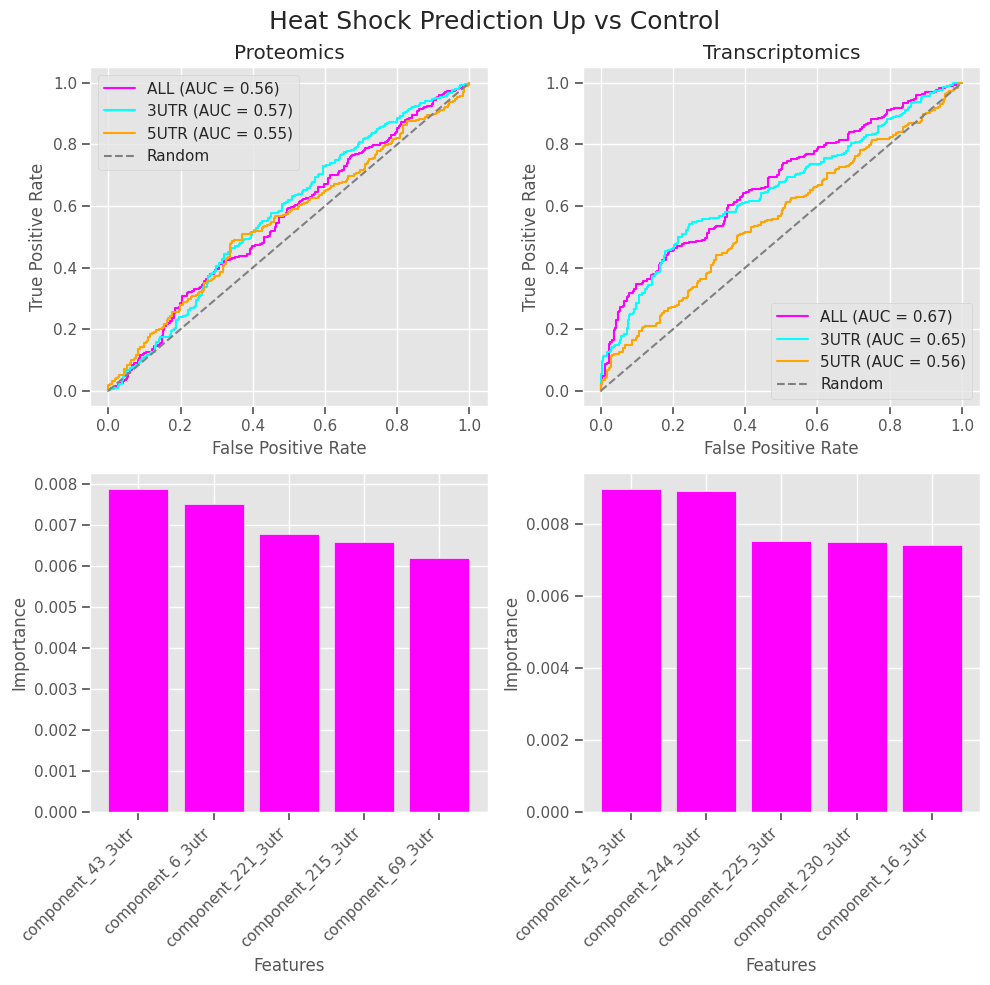

In [ ]:
fig, axes = plt.subplots(figsize=(10,10),ncols =2, nrows=2)
axes = axes.flatten()
ax=  axes[0]
fpr = results_proteomics_all['fpr']
tpr = results_proteomics_all['tpr']
auc = results_proteomics_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_proteomics_3utr['fpr']
tpr = results_proteomics_3utr['tpr']
auc = results_proteomics_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_proteomics_5utr['fpr']
tpr = results_proteomics_5utr['tpr']
auc = results_proteomics_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Proteomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

ax=  axes[2]
top_ind = results_proteomics_all['indices'][0:5]
top_imp = [results_proteomics_all['feature_importance'][i] for i in top_ind]
top_name = [results_proteomics_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')



ax=  axes[1]
fpr = results_rna_seq_all['fpr']
tpr = results_rna_seq_all['tpr']
auc = results_rna_seq_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_rna_seq_3utr['fpr']
tpr = results_rna_seq_3utr['tpr']
auc = results_rna_seq_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_rna_seq_5utr['fpr']
tpr = results_rna_seq_5utr['tpr']
auc = results_rna_seq_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Transcriptomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()


ax=  axes[3]
top_ind = results_rna_seq_all['indices'][0:5]
top_imp = [results_rna_seq_all['feature_importance'][i] for i in top_ind]
top_name = [results_rna_seq_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')


plt.suptitle('Heat Shock Prediction Up vs Control', fontsize=18)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_UP_VS_Cont.png')
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_UP_VS_Cont.svg')
plt.show()

In [ ]:
classification_proteomics[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics.tsv',sep='\t')
classification_rna_seq[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics.tsv',sep='\t')

In [ ]:
df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Proteomics_Down_vs_Control[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
classification_proteomics = df.copy()
classification_proteomics.head()

df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Rna_Seq_Down_vs_Control[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
print(df.shape)
classification_rna_seq = df.copy()
classification_rna_seq.head()

Target
1.0    283
0.0    271
Name: count, dtype: int64
Target
0.0    281
1.0    242
Name: count, dtype: int64
(523, 769)


,component_0_cds,component_1_cds,component_2_cds,component_3_cds,component_4_cds,component_5_cds,component_6_cds,component_7_cds,component_8_cds,component_9_cds,...,component_247_3utr,component_248_3utr,component_249_3utr,component_250_3utr,component_251_3utr,component_252_3utr,component_253_3utr,component_254_3utr,component_255_3utr,Target
Tb927.8.595,-0.589519,-0.577991,-0.464399,-0.540839,-0.858581,-0.475570,0.915446,-0.451219,-0.989409,0.449864,...,1.208930,0.387402,-0.470692,-0.188212,-0.505574,0.652542,0.534388,0.240169,0.718643,1.0
Tb927.8.680,-0.594326,-0.695375,-0.538856,-0.594654,-0.706296,-0.568990,0.834323,-0.483741,-0.896069,0.372311,...,1.160652,0.459546,-0.498238,-0.133206,-0.564081,0.587353,0.487095,0.104862,0.847422,1.0
Tb927.8.760,-0.538151,-0.766823,-0.563342,-0.729398,-0.605045,-0.437192,0.770115,-0.416178,-0.912543,0.447391,...,1.238088,0.471719,-0.473602,-0.237408,-0.628340,0.630679,0.492828,0.277599,0.728243,1.0
Tb927.8.900,-0.572252,-0.651654,-0.498856,-0.609237,-0.882018,-0.445438,0.909149,-0.440103,-0.905557,0.386216,...,1.136222,0.384027,-0.487396,-0.336156,-0.637104,0.697249,0.603343,0.314567,0.663047,0.0
Tb927.8.1190,-0.583516,-0.740584,-0.544812,-0.644565,-0.700621,-0.563972,0.833667,-0.454953,-0.844949,0.382889,...,1.188906,0.425067,-0.520230,-0.239815,-0.552517,0.573974,0.546783,0.322096,0.719784,1.0


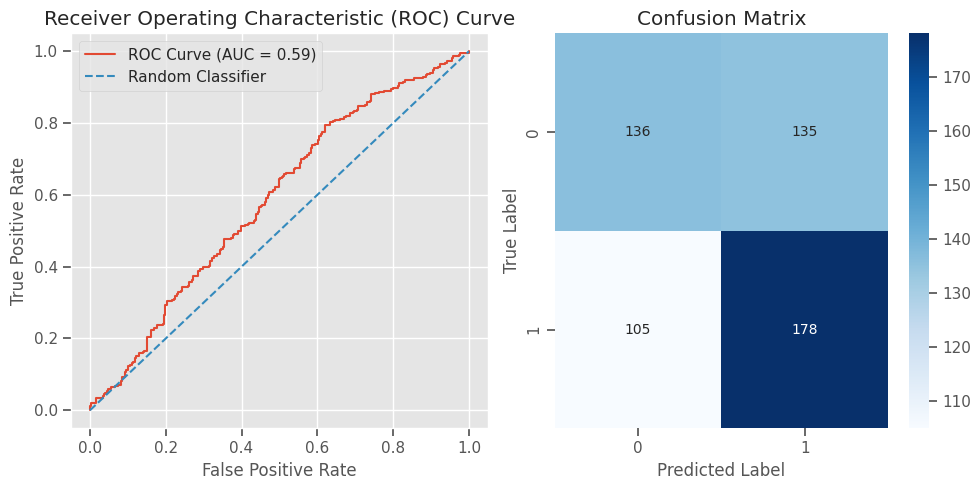

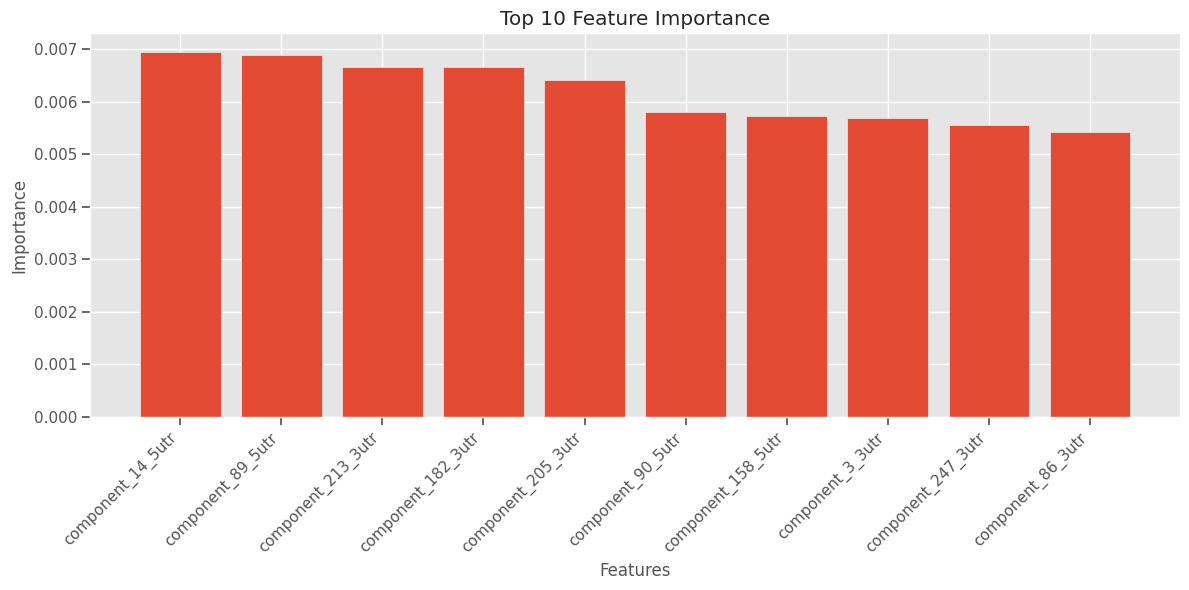


Top 10 Feature Importances:
component_14_5utr: 0.0070
component_89_5utr: 0.0069
component_213_3utr: 0.0067
component_182_3utr: 0.0067
component_205_3utr: 0.0064
component_90_5utr: 0.0058
component_158_5utr: 0.0057
component_3_3utr: 0.0057
component_247_3utr: 0.0056
component_86_3utr: 0.0054
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53       271
         1.0       0.57      0.63      0.60       283

    accuracy                           0.57       554
   macro avg       0.57      0.57      0.56       554
weighted avg       0.57      0.57      0.56       554



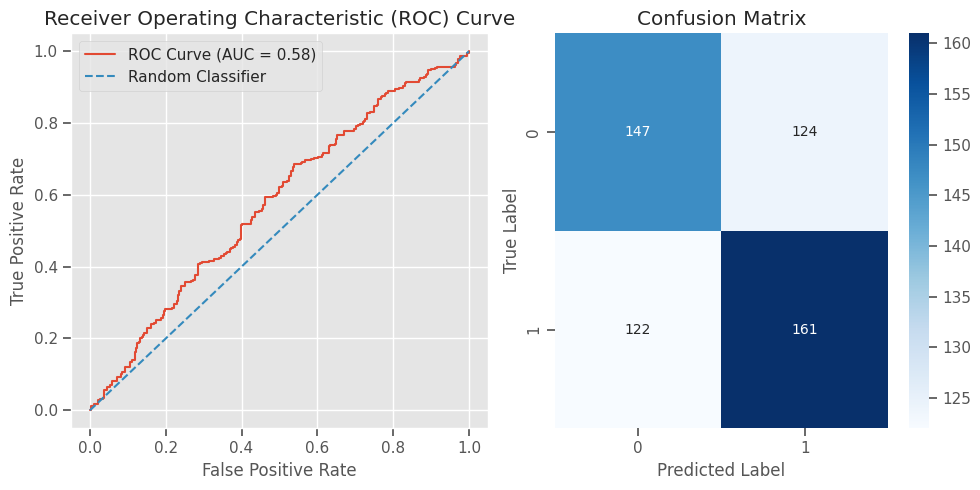

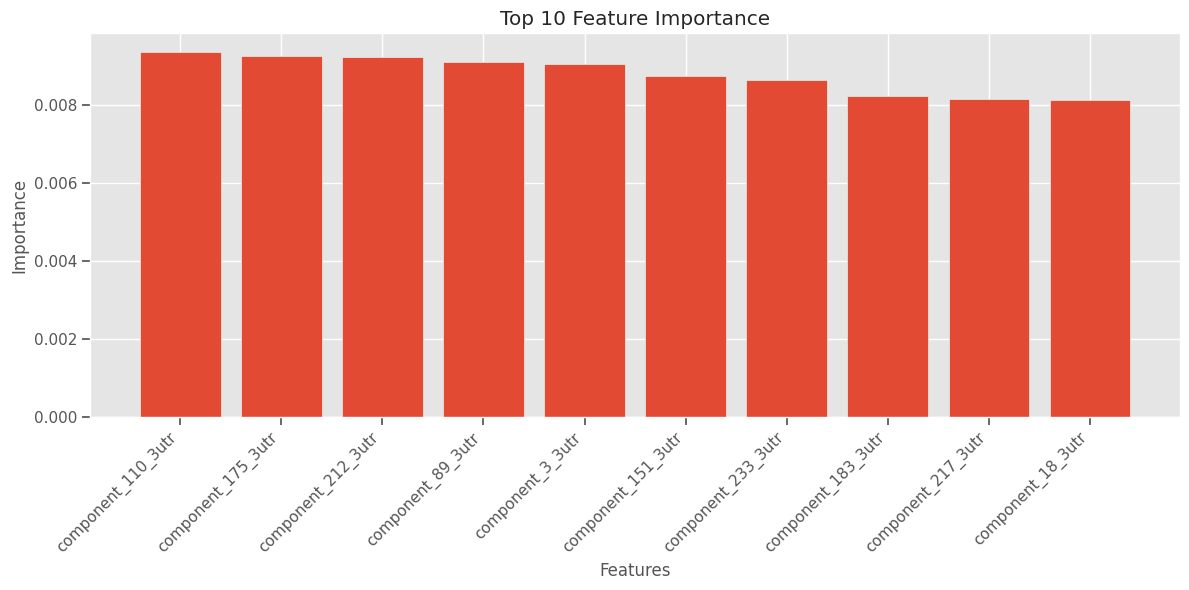


Top 10 Feature Importances:
component_110_3utr: 0.0094
component_175_3utr: 0.0093
component_212_3utr: 0.0092
component_89_3utr: 0.0091
component_3_3utr: 0.0091
component_151_3utr: 0.0087
component_233_3utr: 0.0086
component_183_3utr: 0.0082
component_217_3utr: 0.0082
component_18_3utr: 0.0081
Classification Report:
              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54       271
         1.0       0.56      0.57      0.57       283

    accuracy                           0.56       554
   macro avg       0.56      0.56      0.56       554
weighted avg       0.56      0.56      0.56       554



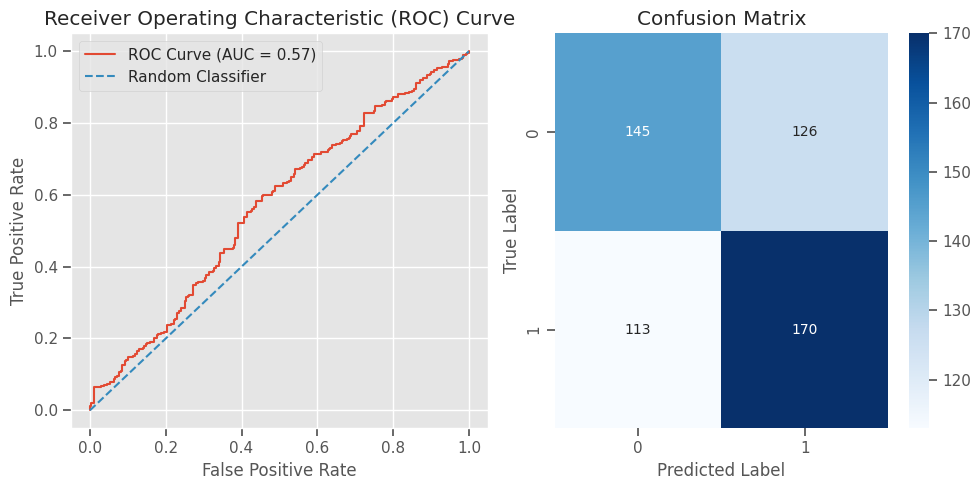

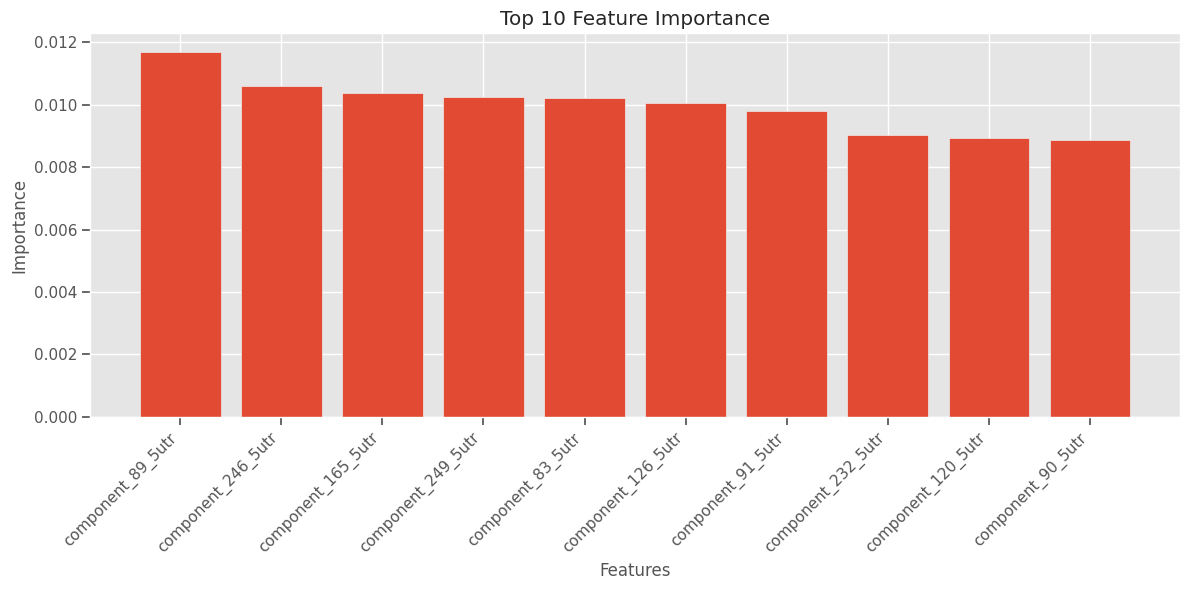


Top 10 Feature Importances:
component_89_5utr: 0.0117
component_246_5utr: 0.0106
component_165_5utr: 0.0104
component_249_5utr: 0.0103
component_83_5utr: 0.0102
component_126_5utr: 0.0100
component_91_5utr: 0.0098
component_232_5utr: 0.0090
component_120_5utr: 0.0089
component_90_5utr: 0.0089
Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.54      0.55       271
         1.0       0.57      0.60      0.59       283

    accuracy                           0.57       554
   macro avg       0.57      0.57      0.57       554
weighted avg       0.57      0.57      0.57       554



In [ ]:
X=classification_proteomics[[n for n in classification_proteomics.columns if n.startswith('component_')]]
y=classification_proteomics['Target']
# Example usage (commented out)
results_proteomics_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_proteomics['preds'] = results_proteomics_all['predictions']

results_proteomics_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_proteomics_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

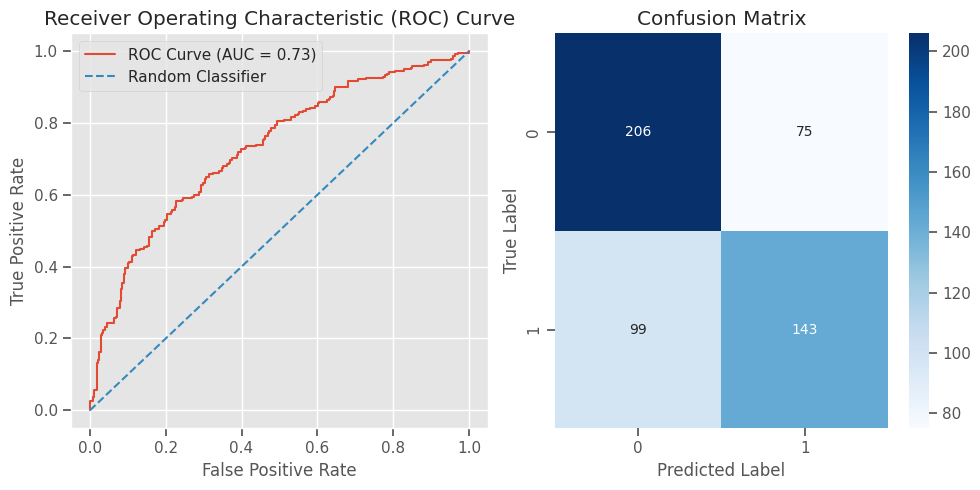

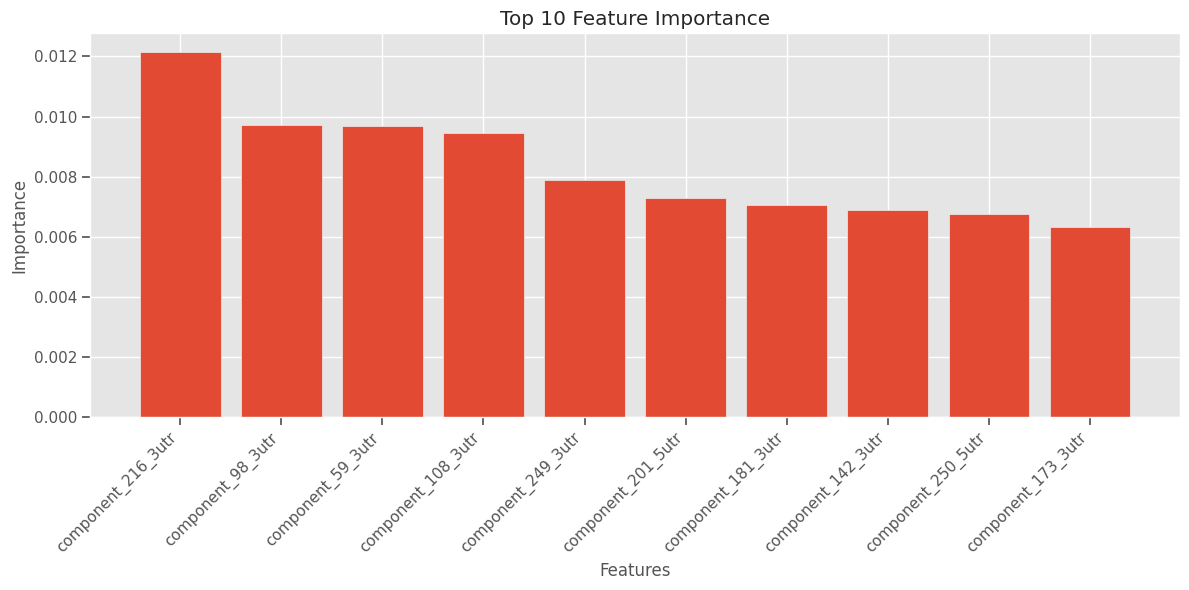


Top 10 Feature Importances:
component_216_3utr: 0.0122
component_98_3utr: 0.0097
component_59_3utr: 0.0097
component_108_3utr: 0.0094
component_249_3utr: 0.0079
component_201_5utr: 0.0073
component_181_3utr: 0.0071
component_142_3utr: 0.0069
component_250_5utr: 0.0067
component_173_3utr: 0.0063
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       281
         1.0       0.66      0.59      0.62       242

    accuracy                           0.67       523
   macro avg       0.67      0.66      0.66       523
weighted avg       0.67      0.67      0.67       523



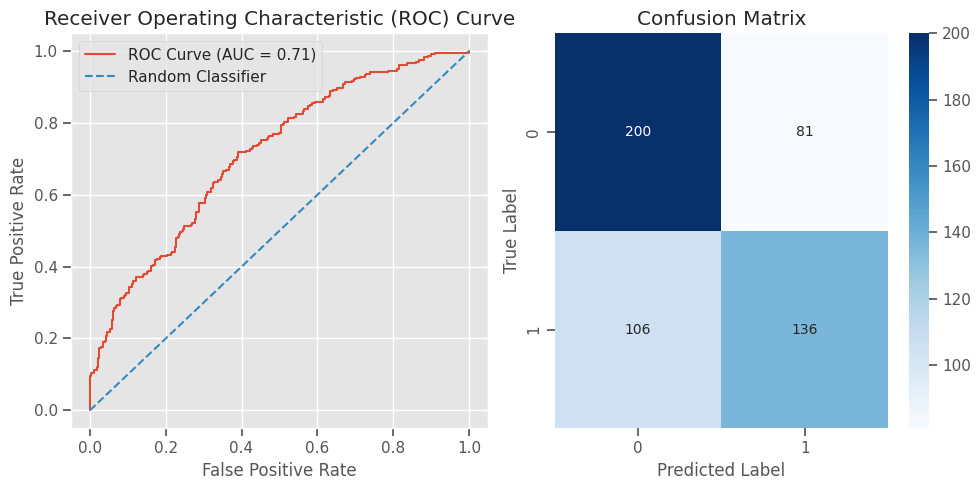

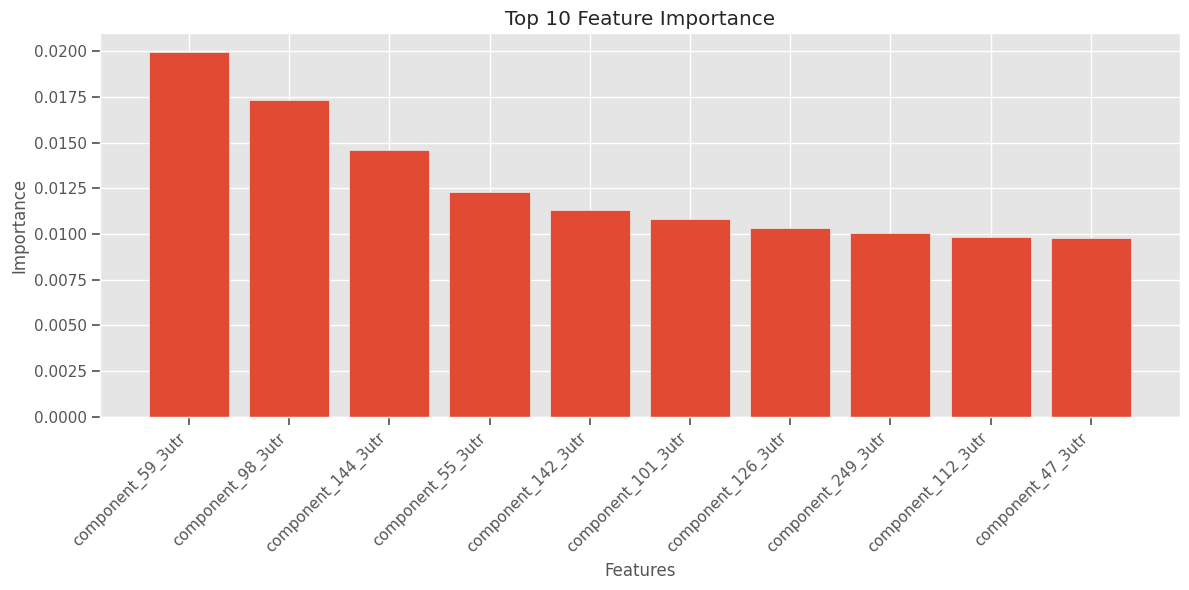


Top 10 Feature Importances:
component_59_3utr: 0.0200
component_98_3utr: 0.0173
component_144_3utr: 0.0146
component_55_3utr: 0.0123
component_142_3utr: 0.0113
component_101_3utr: 0.0108
component_126_3utr: 0.0103
component_249_3utr: 0.0101
component_112_3utr: 0.0098
component_47_3utr: 0.0098
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68       281
         1.0       0.63      0.56      0.59       242

    accuracy                           0.64       523
   macro avg       0.64      0.64      0.64       523
weighted avg       0.64      0.64      0.64       523



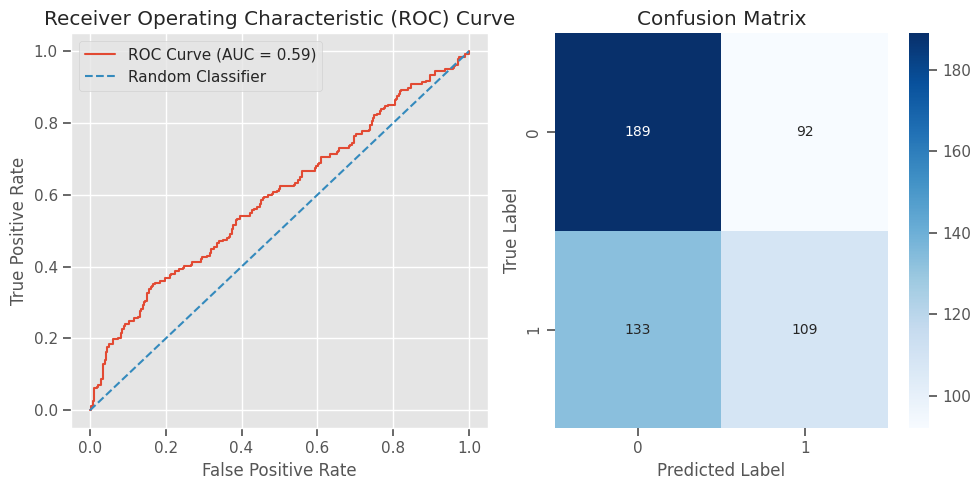

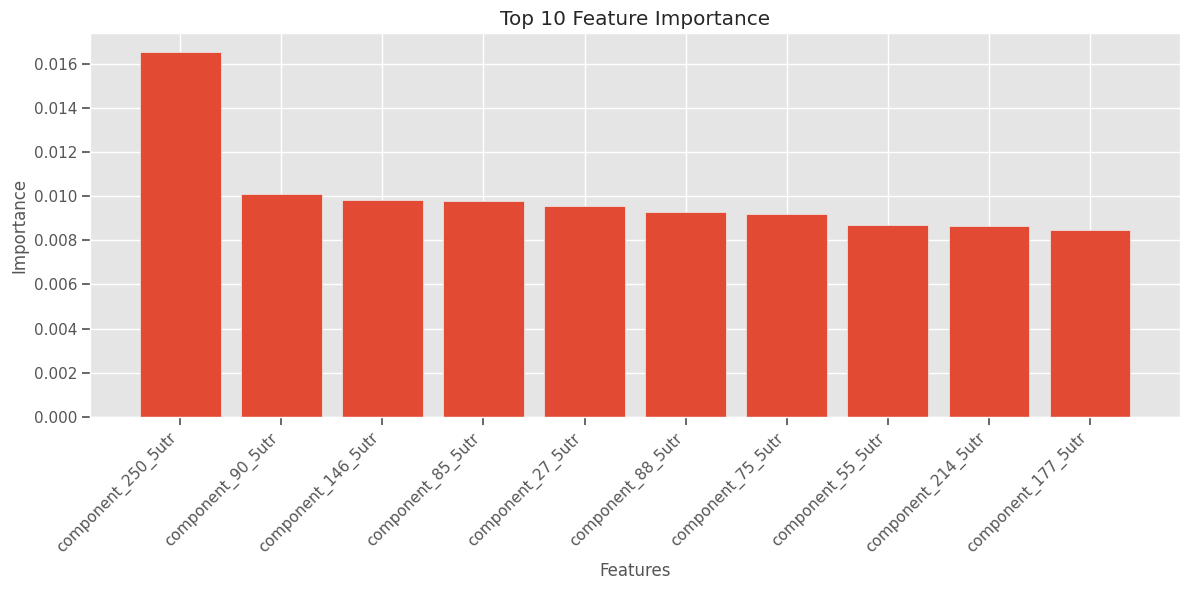


Top 10 Feature Importances:
component_250_5utr: 0.0165
component_90_5utr: 0.0101
component_146_5utr: 0.0098
component_85_5utr: 0.0098
component_27_5utr: 0.0095
component_88_5utr: 0.0093
component_75_5utr: 0.0092
component_55_5utr: 0.0087
component_214_5utr: 0.0087
component_177_5utr: 0.0085
Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63       281
         1.0       0.54      0.45      0.49       242

    accuracy                           0.57       523
   macro avg       0.56      0.56      0.56       523
weighted avg       0.57      0.57      0.56       523



In [ ]:
X=classification_rna_seq[[n for n in classification_rna_seq.columns if n.startswith('component_')]]
y=classification_rna_seq['Target']
# Example usage (commented out)
results_rna_seq_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_rna_seq['preds'] = results_rna_seq_all['predictions']

results_rna_seq_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_rna_seq_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

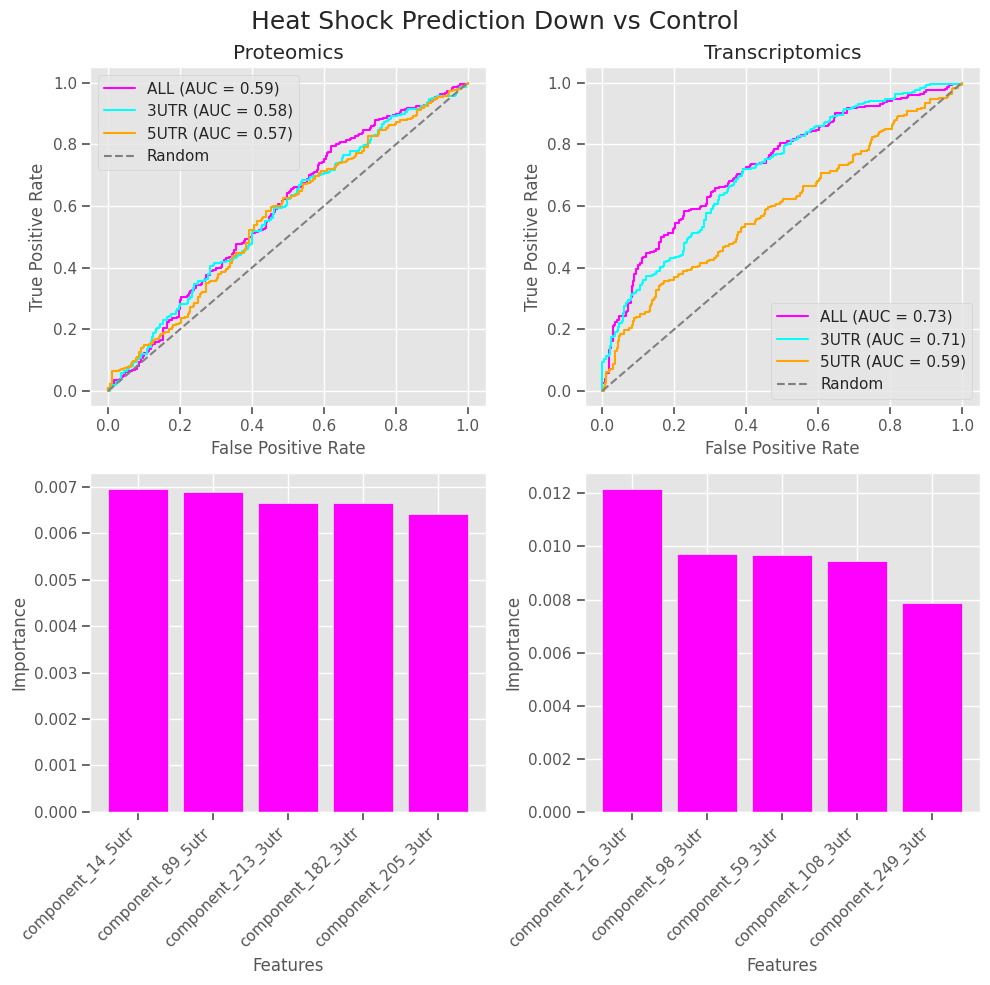

In [ ]:
fig, axes = plt.subplots(figsize=(10,10),ncols =2, nrows=2)
axes = axes.flatten()
ax=  axes[0]
fpr = results_proteomics_all['fpr']
tpr = results_proteomics_all['tpr']
auc = results_proteomics_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_proteomics_3utr['fpr']
tpr = results_proteomics_3utr['tpr']
auc = results_proteomics_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_proteomics_5utr['fpr']
tpr = results_proteomics_5utr['tpr']
auc = results_proteomics_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Proteomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

ax=  axes[2]
top_ind = results_proteomics_all['indices'][0:5]
top_imp = [results_proteomics_all['feature_importance'][i] for i in top_ind]
top_name = [results_proteomics_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')



ax=  axes[1]
fpr = results_rna_seq_all['fpr']
tpr = results_rna_seq_all['tpr']
auc = results_rna_seq_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_rna_seq_3utr['fpr']
tpr = results_rna_seq_3utr['tpr']
auc = results_rna_seq_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_rna_seq_5utr['fpr']
tpr = results_rna_seq_5utr['tpr']
auc = results_rna_seq_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Transcriptomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()


ax=  axes[3]
top_ind = results_rna_seq_all['indices'][0:5]
top_imp = [results_rna_seq_all['feature_importance'][i] for i in top_ind]
top_name = [results_rna_seq_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')


plt.suptitle('Heat Shock Prediction Down vs Control',fontsize=18)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_Down_VS_Cont.png')
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_Down_VS_Cont.svg')
plt.show()

In [ ]:
classification_proteomics[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics.tsv',sep='\t')
classification_rna_seq[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics.tsv',sep='\t')

In [ ]:
df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Proteomics_Up_vs_Down[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
classification_proteomics = df.copy()
classification_proteomics.head()

df = embedding_cds.join(embedding_5utr).join(embedding_3utr).join(Rna_Seq_Up_vs_Down[['Target']],how='left')
df=df.dropna(subset=['Target'])
print(df['Target'].value_counts())
print(df.shape)
classification_rna_seq = df.copy()
classification_rna_seq.head()

Target
1.0    311
0.0    283
Name: count, dtype: int64
Target
1.0    269
0.0    242
Name: count, dtype: int64
(511, 769)


,component_0_cds,component_1_cds,component_2_cds,component_3_cds,component_4_cds,component_5_cds,component_6_cds,component_7_cds,component_8_cds,component_9_cds,...,component_247_3utr,component_248_3utr,component_249_3utr,component_250_3utr,component_251_3utr,component_252_3utr,component_253_3utr,component_254_3utr,component_255_3utr,Target
Tb927.8.595,-0.589519,-0.577991,-0.464399,-0.540839,-0.858581,-0.475570,0.915446,-0.451219,-0.989409,0.449864,...,1.208930,0.387402,-0.470692,-0.188212,-0.505574,0.652542,0.534388,0.240169,0.718643,0.0
Tb927.8.670,-0.566744,-0.689858,-0.571477,-0.628455,-0.698939,-0.570604,0.834648,-0.455378,-0.879387,0.407463,...,1.154631,0.457786,-0.460798,-0.275852,-0.711971,0.742098,0.500968,0.387052,0.670095,1.0
Tb927.8.680,-0.594326,-0.695375,-0.538856,-0.594654,-0.706296,-0.568990,0.834323,-0.483741,-0.896069,0.372311,...,1.160652,0.459546,-0.498238,-0.133206,-0.564081,0.587353,0.487095,0.104862,0.847422,0.0
Tb927.8.760,-0.538151,-0.766823,-0.563342,-0.729398,-0.605045,-0.437192,0.770115,-0.416178,-0.912543,0.447391,...,1.238088,0.471719,-0.473602,-0.237408,-0.628340,0.630679,0.492828,0.277599,0.728243,0.0
Tb927.8.830,-0.657426,-0.671847,-0.499995,-0.670776,-0.471365,-0.430539,0.895953,-0.462125,-0.736467,0.394869,...,1.227742,0.468319,-0.413773,-0.224792,-0.585805,0.685030,0.468213,0.239207,0.709391,1.0


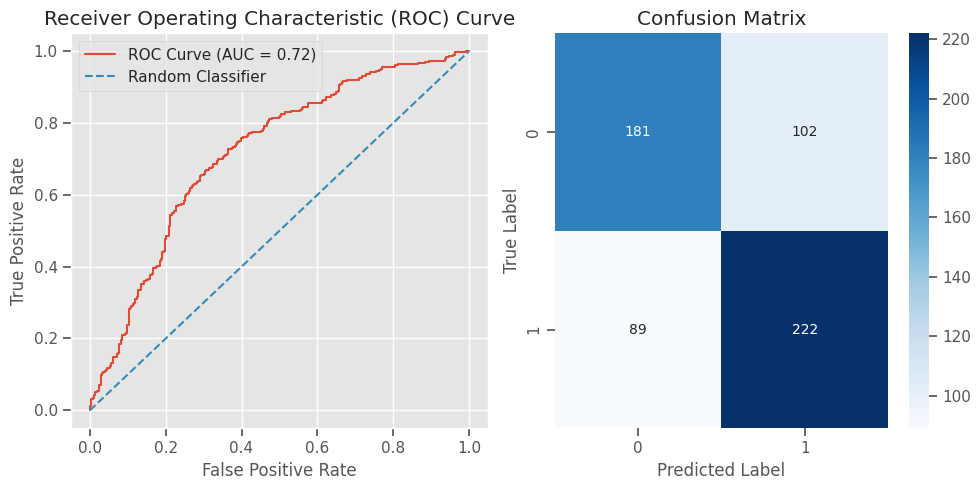

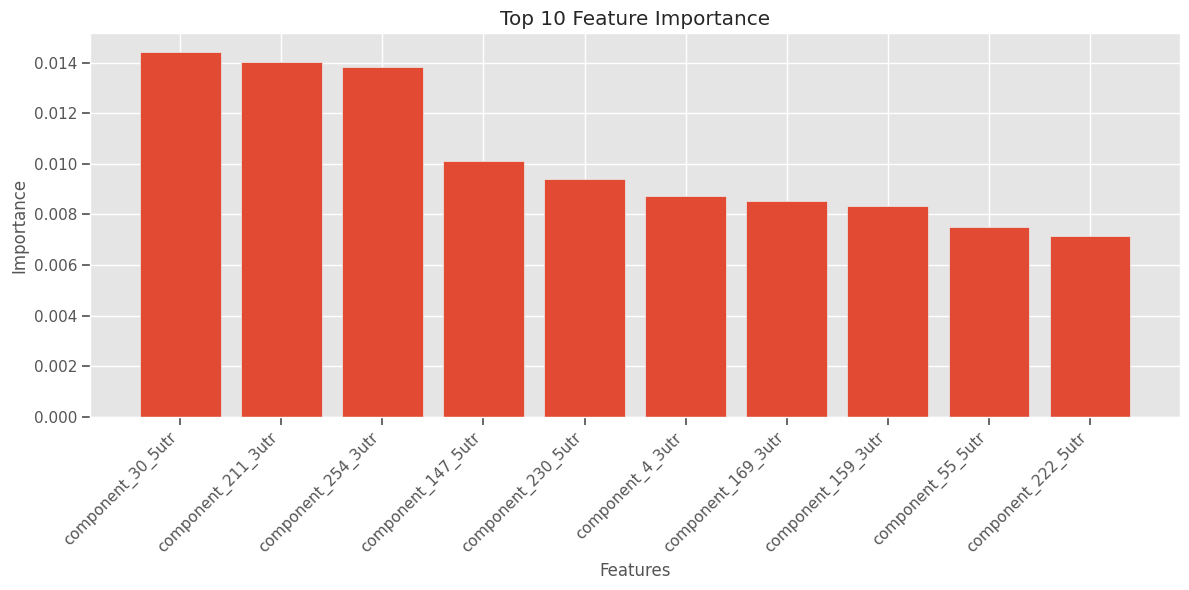


Top 10 Feature Importances:
component_30_5utr: 0.0144
component_211_3utr: 0.0140
component_254_3utr: 0.0138
component_147_5utr: 0.0101
component_230_5utr: 0.0094
component_4_3utr: 0.0087
component_169_3utr: 0.0085
component_159_3utr: 0.0083
component_55_5utr: 0.0075
component_222_5utr: 0.0071
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65       283
         1.0       0.69      0.71      0.70       311

    accuracy                           0.68       594
   macro avg       0.68      0.68      0.68       594
weighted avg       0.68      0.68      0.68       594



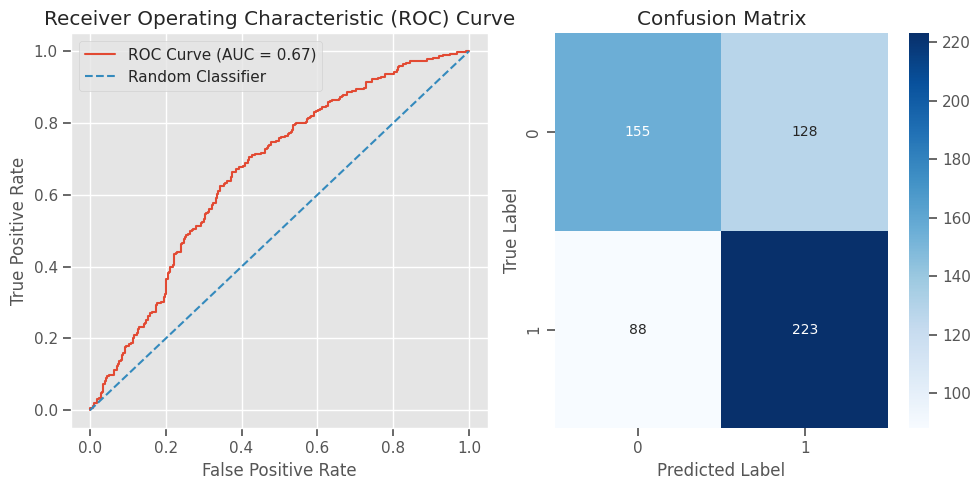

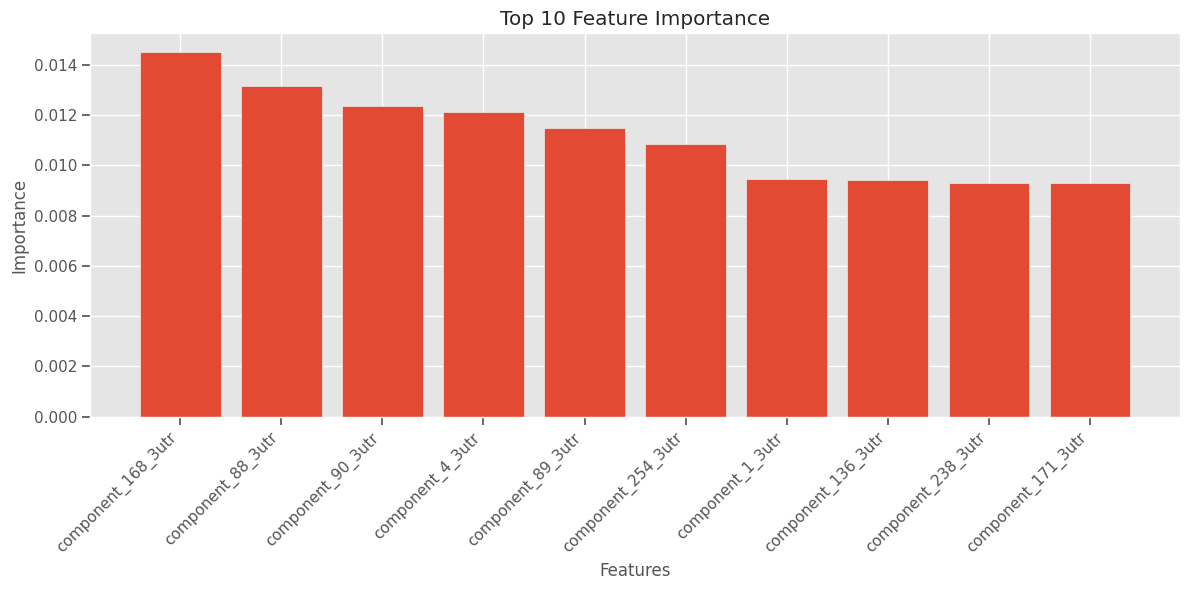


Top 10 Feature Importances:
component_168_3utr: 0.0145
component_88_3utr: 0.0132
component_90_3utr: 0.0124
component_4_3utr: 0.0121
component_89_3utr: 0.0115
component_254_3utr: 0.0108
component_1_3utr: 0.0095
component_136_3utr: 0.0094
component_238_3utr: 0.0093
component_171_3utr: 0.0093
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.55      0.59       283
         1.0       0.64      0.72      0.67       311

    accuracy                           0.64       594
   macro avg       0.64      0.63      0.63       594
weighted avg       0.64      0.64      0.63       594



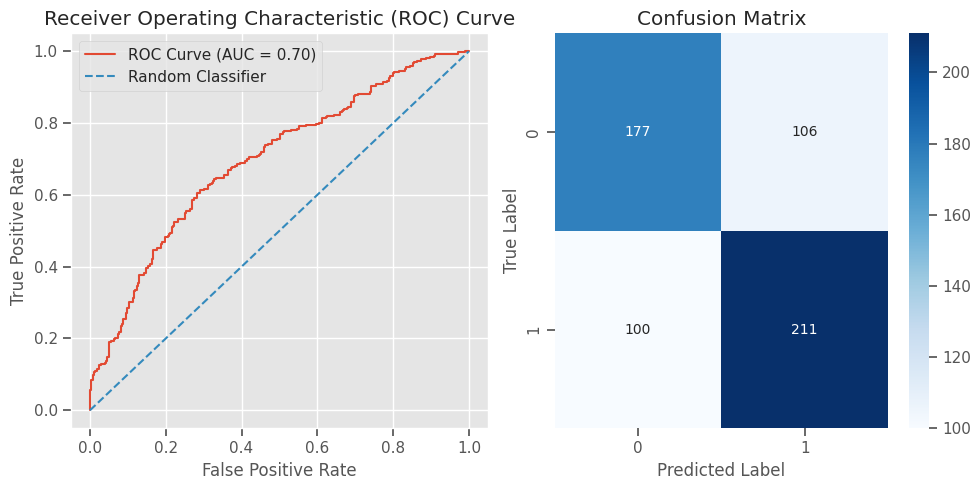

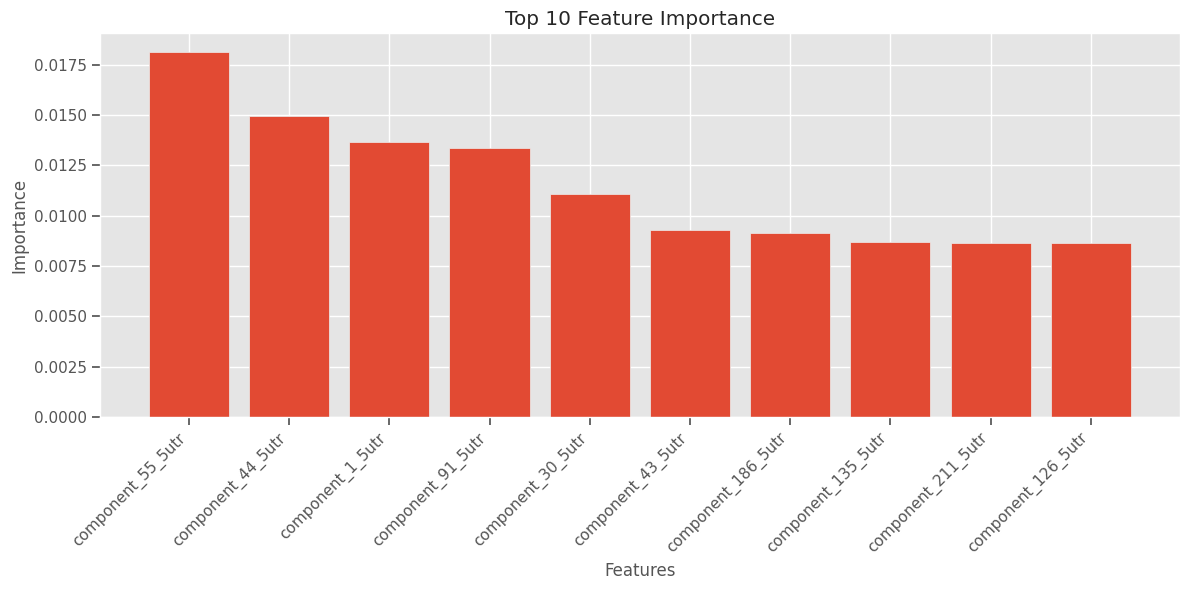


Top 10 Feature Importances:
component_55_5utr: 0.0181
component_44_5utr: 0.0150
component_1_5utr: 0.0137
component_91_5utr: 0.0133
component_30_5utr: 0.0111
component_43_5utr: 0.0093
component_186_5utr: 0.0091
component_135_5utr: 0.0087
component_211_5utr: 0.0086
component_126_5utr: 0.0086
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63       283
         1.0       0.67      0.68      0.67       311

    accuracy                           0.65       594
   macro avg       0.65      0.65      0.65       594
weighted avg       0.65      0.65      0.65       594



In [ ]:
X=classification_proteomics[[n for n in classification_proteomics.columns if n.startswith('component_')]]
y=classification_proteomics['Target']
# Example usage (commented out)
results_proteomics_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_proteomics['preds'] = results_proteomics_all['predictions']

results_proteomics_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_proteomics_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

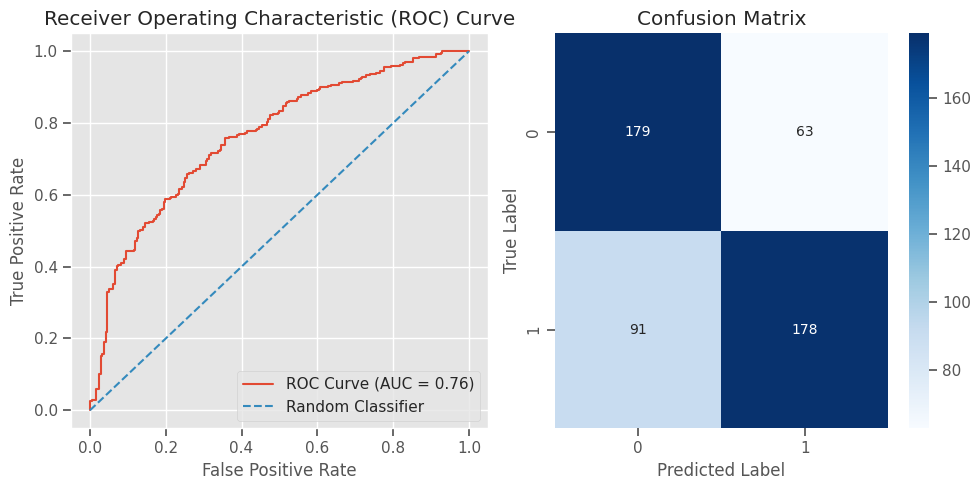

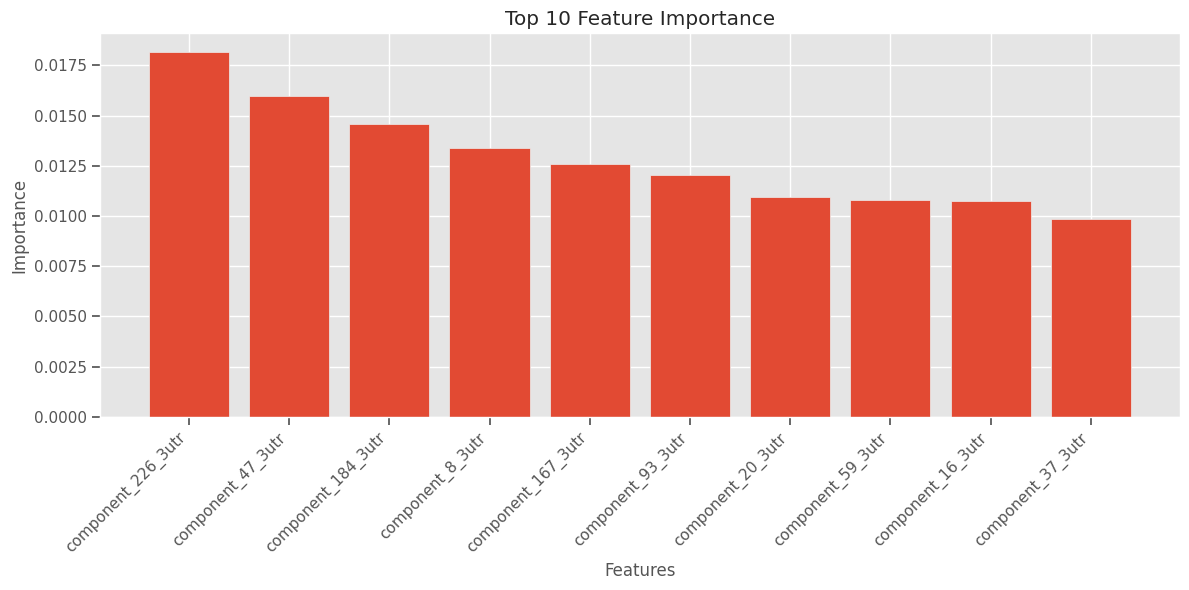


Top 10 Feature Importances:
component_226_3utr: 0.0182
component_47_3utr: 0.0160
component_184_3utr: 0.0146
component_8_3utr: 0.0134
component_167_3utr: 0.0126
component_93_3utr: 0.0120
component_20_3utr: 0.0110
component_59_3utr: 0.0108
component_16_3utr: 0.0108
component_37_3utr: 0.0099
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.74      0.70       242
         1.0       0.74      0.66      0.70       269

    accuracy                           0.70       511
   macro avg       0.70      0.70      0.70       511
weighted avg       0.70      0.70      0.70       511



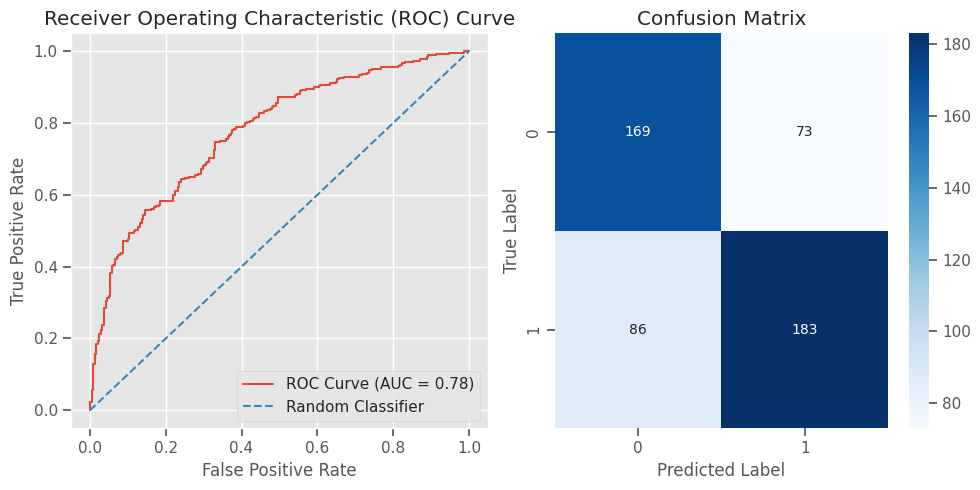

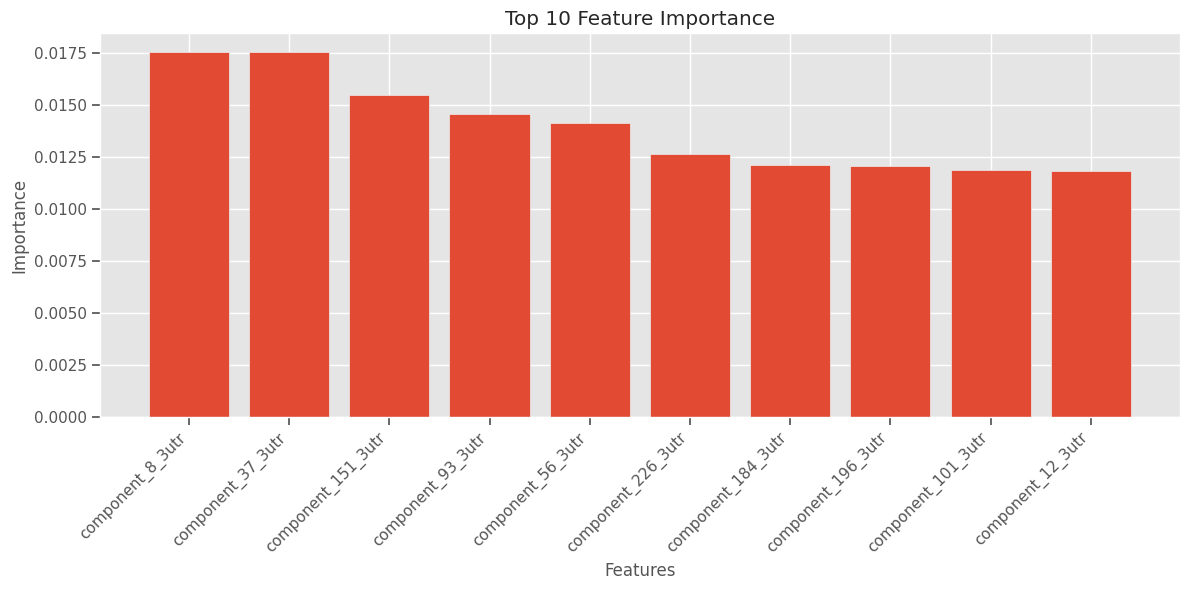


Top 10 Feature Importances:
component_8_3utr: 0.0176
component_37_3utr: 0.0175
component_151_3utr: 0.0155
component_93_3utr: 0.0145
component_56_3utr: 0.0141
component_226_3utr: 0.0127
component_184_3utr: 0.0121
component_196_3utr: 0.0121
component_101_3utr: 0.0119
component_12_3utr: 0.0118
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       242
         1.0       0.71      0.68      0.70       269

    accuracy                           0.69       511
   macro avg       0.69      0.69      0.69       511
weighted avg       0.69      0.69      0.69       511



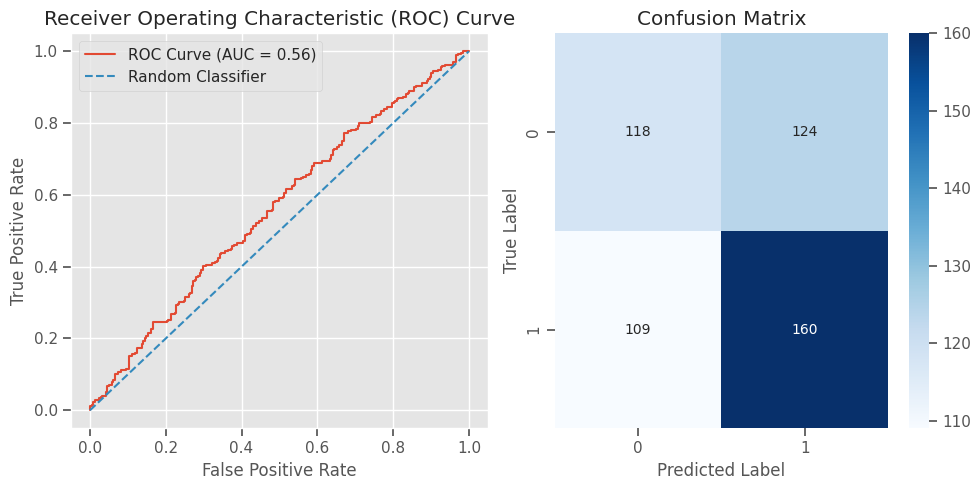

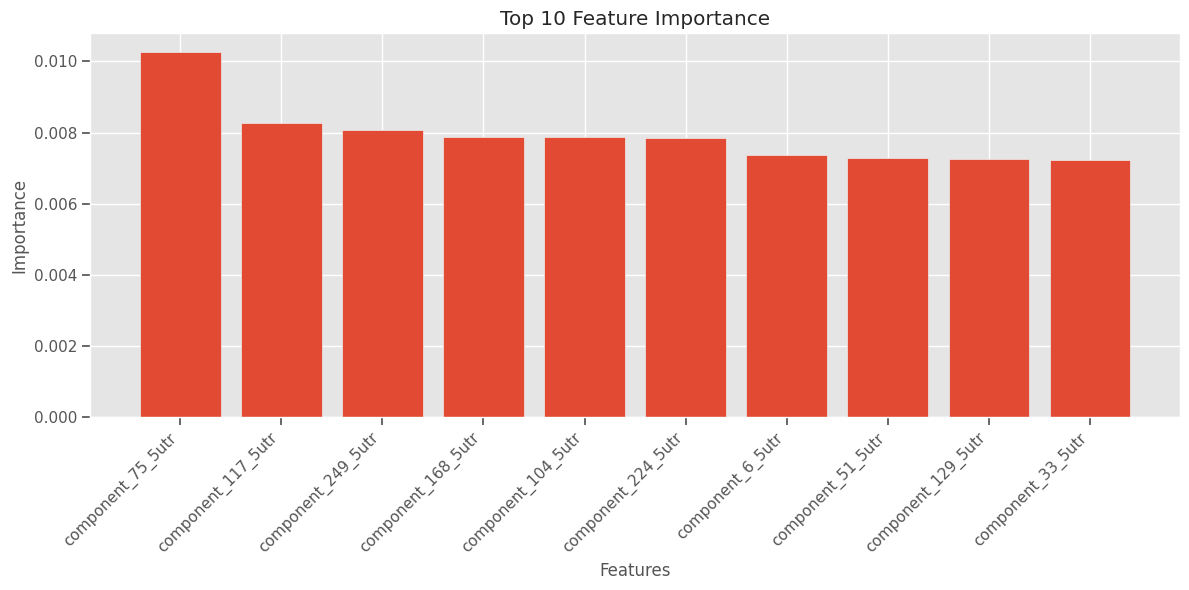


Top 10 Feature Importances:
component_75_5utr: 0.0103
component_117_5utr: 0.0083
component_249_5utr: 0.0081
component_168_5utr: 0.0079
component_104_5utr: 0.0079
component_224_5utr: 0.0078
component_6_5utr: 0.0074
component_51_5utr: 0.0073
component_129_5utr: 0.0072
component_33_5utr: 0.0072
Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.49      0.50       242
         1.0       0.56      0.59      0.58       269

    accuracy                           0.54       511
   macro avg       0.54      0.54      0.54       511
weighted avg       0.54      0.54      0.54       511



In [ ]:
X=classification_rna_seq[[n for n in classification_rna_seq.columns if n.startswith('component_')]]
y=classification_rna_seq['Target']
# Example usage (commented out)
results_rna_seq_all = random_forest_classification(X[[n for n in X.columns if 'cds' not in n]], y)
classification_rna_seq['preds'] = results_rna_seq_all['predictions']

results_rna_seq_3utr = random_forest_classification(X[[n for n in X.columns if '3utr' in n]], y)
results_rna_seq_5utr = random_forest_classification(X[[n for n in X.columns if '5utr' in n]], y)

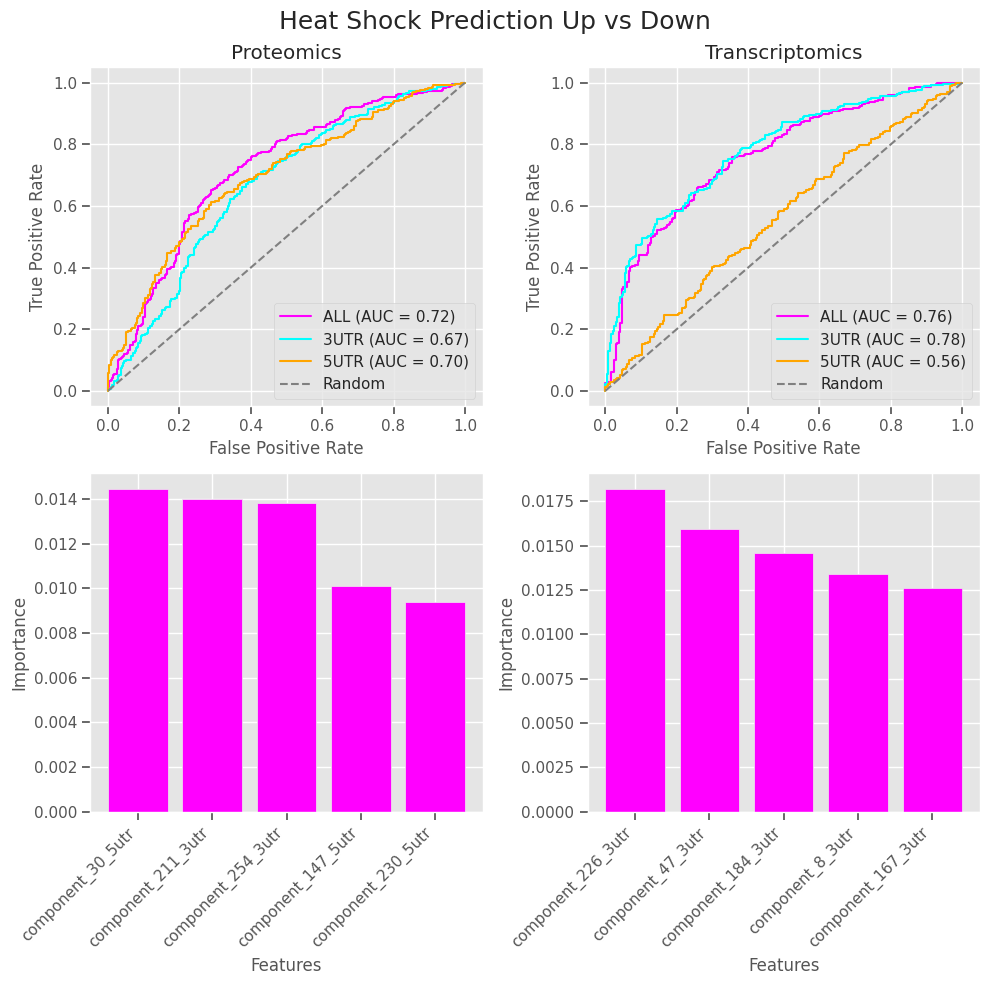

In [ ]:
fig, axes = plt.subplots(figsize=(10,10),ncols =2, nrows=2)
axes = axes.flatten()
ax=  axes[0]
fpr = results_proteomics_all['fpr']
tpr = results_proteomics_all['tpr']
auc = results_proteomics_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_proteomics_3utr['fpr']
tpr = results_proteomics_3utr['tpr']
auc = results_proteomics_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_proteomics_5utr['fpr']
tpr = results_proteomics_5utr['tpr']
auc = results_proteomics_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Proteomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

ax=  axes[2]
top_ind = results_proteomics_all['indices'][0:5]
top_imp = [results_proteomics_all['feature_importance'][i] for i in top_ind]
top_name = [results_proteomics_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')



ax=  axes[1]
fpr = results_rna_seq_all['fpr']
tpr = results_rna_seq_all['tpr']
auc = results_rna_seq_all['auc']
ax.plot(fpr, tpr, label=f'ALL (AUC = {auc:.2f})', c='magenta')

fpr = results_rna_seq_3utr['fpr']
tpr = results_rna_seq_3utr['tpr']
auc = results_rna_seq_3utr['auc']
ax.plot(fpr, tpr, label=f'3UTR (AUC = {auc:.2f})', c='cyan')

fpr = results_rna_seq_5utr['fpr']
tpr = results_rna_seq_5utr['tpr']
auc = results_rna_seq_5utr['auc']
ax.plot(fpr, tpr, label=f'5UTR (AUC = {auc:.2f})', c='orange')

ax.plot([0, 1], [0, 1], linestyle='--', label='Random',c='gray')
ax.set_title('Transcriptomics')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()


ax=  axes[3]
top_ind = results_rna_seq_all['indices'][0:5]
top_imp = [results_rna_seq_all['feature_importance'][i] for i in top_ind]
top_name = [results_rna_seq_all['feature_names'][i] for i in top_ind]

ax.bar(range(len(top_name)), top_imp, color='magenta')
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_xticks(range(len(top_name)), top_name, rotation=45, ha='right')


plt.suptitle('Heat Shock Prediction Up vs Down',fontsize=18)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_Up_VS_Down.png')
plt.savefig('/content/drive/MyDrive/gustavo_data/Heat_Shock_Prediction_Up_VS_Down.svg')
plt.show()

In [ ]:
classification_proteomics[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics.tsv',sep='\t')
classification_rna_seq[['Target',	'preds']].to_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics.tsv',sep='\t')

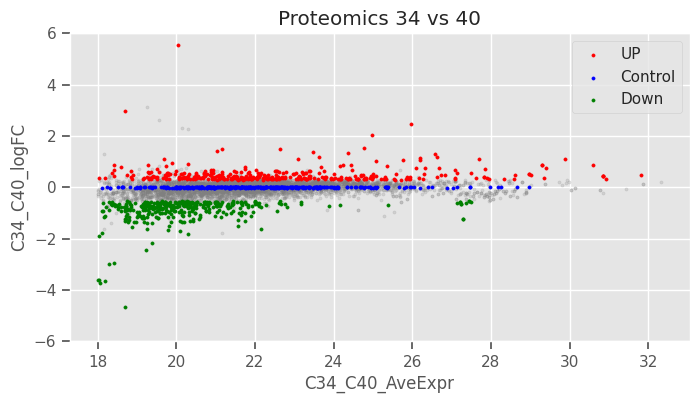

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
proteomics.plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,s=5,alpha=0.2,c='grey')
proteomics.loc[up_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='r',s=5,label='UP')
proteomics.loc[control_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='blue',s=5,label='Control')
proteomics.loc[down_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='green',s=5,label='Down')
plt.title('Proteomics 34 vs 40')
plt.ylim(-6,+6)
plt.show()


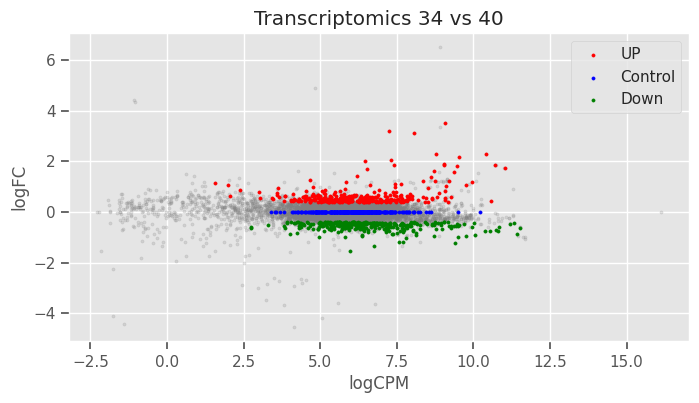

In [ ]:
gustavo_path = '/content/drive/MyDrive/gustavo_data'
gustavo_data = pd.read_csv(f'{gustavo_path}/WT40_vs_WT34.txt',sep='\t',index_col=[0])
fig,ax = plt.subplots(figsize=(8,4))
gustavo_data.plot(kind='scatter',x='logCPM',y='logFC',ax=ax,s=5,alpha=0.2,c='grey')
gustavo_data.loc[up_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='r',s=5,label='UP')
gustavo_data.loc[control_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='blue',s=5,label='Control')
gustavo_data.loc[down_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='green',s=5,label='Down')
plt.title('Transcriptomics 34 vs 40')
plt.show()

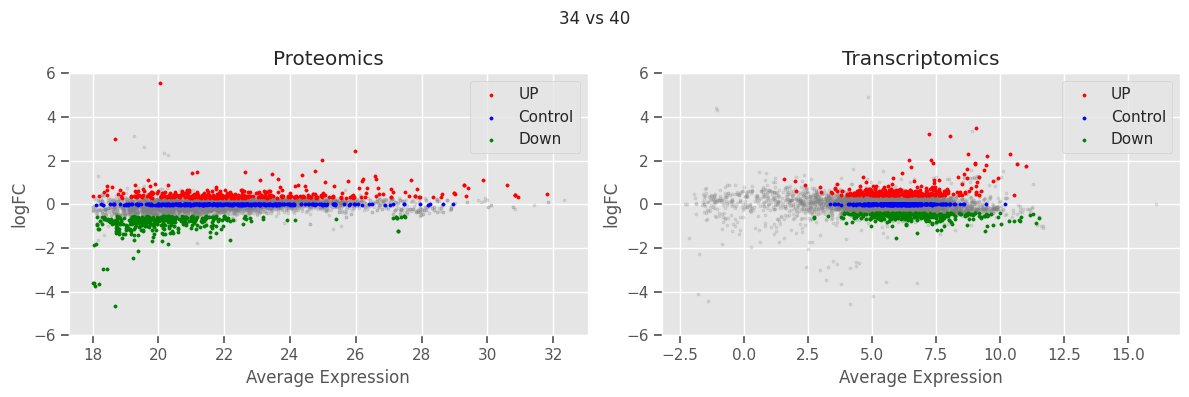

In [ ]:
fig,axes = plt.subplots(figsize=(12,4),ncols=2)
ax =  axes[0]
proteomics.plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,s=5,alpha=0.2,c='grey')
proteomics.loc[up_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='r',s=5,label='UP')
proteomics.loc[control_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='blue',s=5,label='Control')
proteomics.loc[down_proteins.index.values].plot(kind='scatter',x='C34_C40_AveExpr',y='C34_C40_logFC',ax=ax,c='green',s=5,label='Down')
ax.set_title('Proteomics')
ax.set_ylim(-6,+6)
ax.set_xlabel('Average Expression')
ax.set_ylabel('logFC')

ax =  axes[1]
gustavo_path = '/content/drive/MyDrive/gustavo_data'
gustavo_data = pd.read_csv(f'{gustavo_path}/WT40_vs_WT34.txt',sep='\t',index_col=[0])
gustavo_data.plot(kind='scatter',x='logCPM',y='logFC',ax=ax,s=5,alpha=0.2,c='grey')
gustavo_data.loc[up_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='r',s=5,label='UP')
gustavo_data.loc[control_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='blue',s=5,label='Control')
gustavo_data.loc[down_rnaseq.index.values].plot(kind='scatter',x='logCPM',y='logFC',ax=ax,c='green',s=5,label='Down')
ax.set_title('Transcriptomics')
ax.set_ylim(-6,+6)
ax.set_xlabel('Average Expression')
ax.set_ylabel('logFC')
plt.suptitle('34 vs 40')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/gustavo_data/dataset.png')
plt.savefig('/content/drive/MyDrive/gustavo_data/dataset.svg')
plt.show()

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

def sequences_to_fasta(df, sequence_column, output_file=None, header_column=None):

    # Prepare SeqRecord objects
    seq_records = []

    # Iterate through DataFrame rows
    for index, row in df.iterrows():
        # Determine header
        if header_column:
            header = str(row[header_column])
        else:
            header = str(index)

        # Create SeqRecord
        sequence = str(row[sequence_column])
        seq_record = SeqRecord(
            Seq(sequence),  # Convert to Biopython Seq object
            id=header,      # Sequence identifier
            description=''  # Optional description (left empty here)
        )

        seq_records.append(seq_record)

    # Output handling
    if output_file:
        # Ensure directory exists
        os.makedirs(os.path.dirname(output_file), exist_ok=True)

        # Write to file
        SeqIO.write(seq_records, output_file, "fasta")
        print(f"FASTA file saved to {output_file}")
        return None
    else:
        return seq_records


In [ ]:
sequences = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_DATASET.csv.gz',index_col=0)
sequences = sequences[['sequence_3p','sequence_5p']]
sequences.head()

,sequence_3p,sequence_5p
Tb927.3.5260,TGAACAGTTGTGAAGTTAGGACGGGGCGTATGTTGCCTTCCTTTTG...,CTTCCTTTCTTTCTTTTTTCCCCCACCGCTTACTCTTTATCTATAC...
Tb927.3.5270,AGTGGGCTAACAAACACGGTAGTCGCAACGATAATAACATCGAGCT...,GCCACACGGGGGCGAGCCGATTTGGGTGGTATTTTTTCCTCCCTTC...
Tb927.3.5280,TTGGTGTGGGAGAGAATGATTCTAAATGACAAGGGCTGATCATGTG...,AGTGTGCTCTGTTGACACTGTTGGTGTAATTAATCTATTTCAAATA...
Tb927.3.5290,ATGCGTTGAAGAAGGAGAAGCGAATTTTAAGTTTCATGAGTGTGGT...,GTGCTGAATAAGCAGCCGTGTCCACAAAACGAGAAGGAGGCCGGTG...
Tb927.3.5300,TGCTATTGGTAGCATTTTCGTTGTTTCATTTCGTAACCTCCTTGAG...,AAAGGATAGCACAGGTCCTCCCCCCTTTTTTCTTGGGCAGTACTCT...


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_pos.fasta')


FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_pos.fasta


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_pos.fasta')


FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_pos.fasta


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_pos.fasta')



FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_pos.fasta


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_pos.fasta')



FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_pos.fasta


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_pos.fasta')



FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_pos.fasta


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics.tsv',sep='\t',index_col=[0])
dataset = dataset.join(sequences,how='inner')
sequences_to_fasta(dataset[
    (dataset['Target']==0) &
     (dataset['preds']==0)
     ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics_neg.fasta')

sequences_to_fasta(dataset[

    (dataset['Target']==1) &
    (dataset['preds']==1)

    ], 'sequence_3p', output_file='/content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics_pos.fasta')



FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_transcriptomics_pos.fasta


In [ ]:



#
#Up_vs_Down_transcriptomics

In [ ]:
labels = [
    'Down_vs_Control_proteomics','Down_vs_Control_transcriptomics',
    'Up_vs_Control_proteomics','Up_vs_Control_transcriptomics',
    'Up_vs_Down_proteomics','Up_vs_Down_transcriptomics'
    ]

In [ ]:
#label = 'Down_vs_Control_proteomics'
sequence_type = '5p'
for label in labels:
  dataset = pd.read_csv(f'/content/drive/MyDrive/gustavo_data/ML_results_{label}.tsv',sep='\t',index_col=[0])
  dataset = dataset.join(sequences,how='inner')
  sequences_to_fasta(dataset[
      (dataset['Target']==0) &
      (dataset['preds']==0)
      ], f'sequence_{sequence_type}', output_file=f'/content/drive/MyDrive/gustavo_data/ML_results_{label}_{sequence_type}_neg.fasta')

  sequences_to_fasta(dataset[

      (dataset['Target']==1) &
      (dataset['preds']==1)

      ], f'sequence_{sequence_type}', output_file=f'/content/drive/MyDrive/gustavo_data/ML_results_{label}_{sequence_type}_pos.fasta')


FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_5p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_5p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_5p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_5p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_5p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_5p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_5p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_5p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_5p_neg.fasta
FASTA file saved to /content/d

In [ ]:
sequence_type = '3p'
for label in labels:
  dataset = pd.read_csv(f'/content/drive/MyDrive/gustavo_data/ML_results_{label}.tsv',sep='\t',index_col=[0])
  dataset = dataset.join(sequences,how='inner')
  sequences_to_fasta(dataset[
      (dataset['Target']==0) &
      (dataset['preds']==0)
      ], f'sequence_{sequence_type}', output_file=f'/content/drive/MyDrive/gustavo_data/ML_results_{label}_{sequence_type}_neg.fasta')

  sequences_to_fasta(dataset[
jal
      ], f'sequence_{sequence_type}', output_file=f'/content/drive/MyDrive/gustavo_data/ML_results_{label}_{sequence_type}_pos.fasta')


FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_3p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_proteomics_3p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_3p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Down_vs_Control_transcriptomics_3p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_3p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_proteomics_3p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_3p_neg.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Control_transcriptomics_3p_pos.fasta
FASTA file saved to /content/drive/MyDrive/gustavo_data/ML_results_Up_vs_Down_proteomics_3p_neg.fasta
FASTA file saved to /content/d

In [ ]:
#embedding_cds.head()
embedding_5utr.head()

,component_0_5utr,component_1_5utr,component_2_5utr,component_3_5utr,component_4_5utr,component_5_5utr,component_6_5utr,component_7_5utr,component_8_5utr,component_9_5utr,...,component_246_5utr,component_247_5utr,component_248_5utr,component_249_5utr,component_250_5utr,component_251_5utr,component_252_5utr,component_253_5utr,component_254_5utr,component_255_5utr
Tb927.8.340,-0.605384,-0.666501,-0.331434,-0.323830,-0.798752,-0.570574,0.741135,-0.477329,-0.940349,0.440846,...,-0.157079,1.365536,0.281623,-0.482180,-0.174602,-0.695372,0.374852,0.493518,0.319140,0.695101
Tb927.8.380,-0.639779,-0.559242,-0.404565,-0.357003,-0.738058,-0.650140,0.725921,-0.479509,-0.957356,0.386129,...,-0.225910,1.411280,0.271711,-0.441438,-0.120766,-0.674391,0.428917,0.490648,0.231575,0.665034
Tb927.8.480,-0.608532,-0.605069,-0.393555,-0.399145,-0.872821,-0.613840,0.770049,-0.498495,-0.964813,0.396339,...,-0.093075,1.279321,0.401590,-0.478882,-0.138287,-0.652894,0.479924,0.452182,0.226281,0.813625
Tb927.8.540,-0.486269,-0.418730,-0.413889,-0.496963,-0.886093,-0.504282,0.752243,-0.531219,-1.020438,0.434306,...,-0.125416,1.249765,0.308214,-0.447631,-0.256793,-0.502770,0.458692,0.553970,0.135721,0.751996
Tb927.8.550,-0.676879,-0.669090,-0.545473,-0.490261,-0.698090,-0.709435,0.807114,-0.529909,-0.921179,0.345906,...,-0.149661,1.300542,0.475598,-0.444059,-0.205190,-0.606366,0.660416,0.449928,0.230415,0.722409


In [ ]:
embedding_3utr.head()

,component_0_3utr,component_1_3utr,component_2_3utr,component_3_3utr,component_4_3utr,component_5_3utr,component_6_3utr,component_7_3utr,component_8_3utr,component_9_3utr,...,component_246_3utr,component_247_3utr,component_248_3utr,component_249_3utr,component_250_3utr,component_251_3utr,component_252_3utr,component_253_3utr,component_254_3utr,component_255_3utr
Tb927.8.340,-0.527866,-0.904402,-0.476395,-0.716711,-0.195486,-0.588037,0.716018,-0.498448,-0.759786,0.450476,...,-0.206951,1.217274,0.346845,-0.568741,-0.250465,-0.688297,0.632409,0.643759,0.376611,0.659458
Tb927.8.380,-0.630472,-0.879184,-0.499981,-0.584116,-0.422706,-0.699780,0.695966,-0.461647,-0.857175,0.482070,...,-0.147077,1.318670,0.390364,-0.516648,-0.179017,-0.686082,0.694931,0.514004,0.358645,0.726511
Tb927.8.480,-0.576827,-0.868981,-0.520498,-0.602077,-0.421678,-0.636654,0.726279,-0.455275,-0.897762,0.496928,...,-0.139720,1.288906,0.382245,-0.567920,-0.223371,-0.650151,0.716816,0.567429,0.384565,0.704659
Tb927.8.540,-0.627093,-0.486673,-0.428136,-0.395638,-0.979263,-0.592146,0.821922,-0.530973,-1.023468,0.367503,...,-0.107043,1.205897,0.385813,-0.392866,-0.175907,-0.527459,0.555906,0.487318,0.187648,0.677320
Tb927.8.550,-0.610639,-0.810289,-0.574374,-0.550382,-0.505175,-0.674961,0.779604,-0.484060,-0.842080,0.398740,...,-0.081096,1.221794,0.401508,-0.482337,-0.238556,-0.657750,0.790268,0.546231,0.360103,0.702546


In [ ]:
embedding_5utr.index = [n for n in embedding_5utr.index.values]

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/trypanosoma_sequences_3utr.csv')
dataset=dataset.set_index('gene_id')
dataset.head()

,sequence
gene_id,
Tb927.8.340,AATTAGTTTTGTAAAATATTATTTCTTTAATTTATGTTACCTACCA...
Tb927.8.380,AATTTTAGAAATTTAAGGATTTCTTTTTACCCTGATATATTTTAAC...
Tb927.8.480,TCACGCGTGATGATTGTTTTCCTCACTTTATCTTTTCCCCATAATA...
Tb927.8.540,AGGTGCGCCAGAGACAGTCGCGTCTCAAAATTGTTCTACCCCGCAC...
Tb927.8.550,ATGGCACAATTTTTCTCCCCTAGAGAACTCTCAAATCTCCCTCAAC...


In [ ]:
sequences_to_fasta(dataset,
                   sequence_column='sequence',
                   output_file=f'/content/drive/MyDrive/gustavo_data/trypanosoma_sequences_3utr.fa')

FASTA file saved to /content/drive/MyDrive/gustavo_data/trypanosoma_sequences_3utr.fa


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/trypanosoma_sequences_5utr.csv')
dataset=dataset.set_index('gene_id')
dataset.head()
sequences_to_fasta(dataset,
                   sequence_column='sequence',
                   output_file=f'/content/drive/MyDrive/gustavo_data/trypanosoma_sequences_5utr.fa')

FASTA file saved to /content/drive/MyDrive/gustavo_data/trypanosoma_sequences_5utr.fa
